## Importar as bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', None)

## 📘 Dicionário de Dados — `df_join_final.xlsx`

Cada linha representa **um município em um determinado ano**  
(chave composta: `ano` + `cod_ibge` + `localidade`)

---

<details>
<summary>🧭 <b>Estrutura Geral</b></summary>

| Coluna | Descrição |
|--------|------------|
| `ano` | Ano de referência do dado. |
| `cod_ibge` | Código IBGE do município. |
| `localidade` | Nome do município. |

</details>

---

<details>
<summary>👷‍♀️ <b>Mercado de Trabalho — Agregados Gerais</b></summary>

| Coluna | Descrição |
|--------|------------|
| `emprego_formal` | Total de vínculos formais ativos (RAIS/CAGED). |
| `emp_c_sal` | Vínculos com remuneração positiva. |
| `massa_rendimentos_num` | Soma dos rendimentos formais (R$ correntes). |

</details>

---

<details>
<summary>🏭 <b>Estrutura Produtiva — Diversidade de CNAEs</b></summary>

> Representam **quantos códigos CNAE distintos** existem no município/ano em cada setor (indicador de diversidade produtiva).

| Coluna | Setor |
|--------|-------|
| `qtd_formal_Administração_Pública` | Administração pública |
| `qtd_formal_Agropecuária` | Agropecuária |
| `qtd_formal_Indústria` | Indústria |
| `qtd_formal_Serviços` | Serviços |

</details>

---

<details>
<summary>💰 <b>PIB Municipal — Valores e Setores</b></summary>

| Coluna | Descrição |
|--------|------------|
| `pib` | PIB total do município (R$ correntes). |
| `pib_agropecuaria` | PIB do setor agropecuário. |
| `pib_industria` | PIB do setor industrial. |
| `pib_servicos` | PIB do setor de serviços. |
| `pib_servicos_adm_publica` | PIB dos serviços de administração pública. |
| `pib_impostos_liq_sub` | Impostos líquidos de subsídios. |

</details>

---

<details>
<summary>📊 <b>Indicadores de Preços (IPCA)</b></summary>

| Coluna | Descrição |
|--------|------------|
| `ipca_geral` | IPCA geral (% a.a.). |
| `ipca_alimentos_bebidas` | IPCA do grupo Alimentos e Bebidas (% a.a.). |
| `ipca_habitacao` | IPCA do grupo Habitação (% a.a.). |
| `ipca_transportes` | IPCA do grupo Transportes (% a.a.). |
| `ipca_saude_cuidados_pessoais` | IPCA do grupo Saúde e Cuidados Pessoais (% a.a.). |
| `ipca_educacao` | IPCA do grupo Educação (% a.a.). |
| `ipca_comunicacao` | IPCA do grupo Comunicação (% a.a.). |
| `ipca_despesas_pessoais` | IPCA do grupo Despesas Pessoais (% a.a.). |
| `ipca_artigos_residencia` | IPCA do grupo Artigos de Residência (% a.a.). |
| `ipca_vestuario` | IPCA do grupo Vestuário (% a.a.). |

</details>

---

<details>
<summary>👨‍👩‍👧 <b>População e Vulnerabilidade</b></summary>

| Coluna | Descrição |
|--------|------------|
| `Pop_2020` | População estimada (IBGE, 2020). |
| `perc_rf_ate_meio_sm` | % de pessoas com renda per capita ≤ 0,5 SM. |
| `perc_rf_ate_1_sm` | % de pessoas com renda per capita ≤ 1 SM. |
| `perc_rf_ate_2_sm` | % de pessoas com renda per capita ≤ 2 SM. |

</details>

---

<details>
<summary>🏛️ <b>Assistência e Desenvolvimento Social</b></summary>

| Coluna | Descrição |
|--------|------------|
| `bpc_total` | Total de beneficiários do BPC (Benefício de Prestação Continuada). |
| `bpc_idoso` | Beneficiários BPC — idosos. |
| `bpc_pcd` | Beneficiários BPC — pessoas com deficiência. |
| `bpc_total_pc` | Beneficiários BPC per capita (`bpc_total / Pop_2020`). |

</details>

---

<details>
<summary>🧮 <b>Indicadores Derivados (para análises)</b></summary>

| Indicador | Fórmula | Interpretação |
|------------|----------|----------------|
| `pib_setorial_pc` | `pib_setor / Pop_2020` | PIB setorial per capita. |
| `renda_media_vinc` | `massa_rendimentos_num / emprego_formal` | Renda média por vínculo formal. |
| `razao_pib_renda` | `pib_setorial_pc / renda_media_vinc` | Relação entre PIB setorial e renda média formal. |
| `per_capita_massa_rendimentos` | `massa_rendimentos_num / Pop_2020` | Massa de rendimentos per capita. |

</details>

---

<details>
<summary>📚 <b>Fontes dos Dados</b></summary>

- IBGE — Estimativas populacionais e PIB municipal.  
- RAIS/CAGED — Emprego formal e massa de rendimentos.  
- IPEA / SIDRA / DataSUS — Indicadores sociais e IPCA.  
- Ministério da Cidadania — Benefício de Prestação Continuada (BPC).

</details>

---

<details>
<summary>📈 <b>Sugestões de Normalização</b></summary>

- **Per capita:** dividir por `Pop_2020` (para PIB, massa de rendimentos, BPC etc.)  
- **Por vínculo:** dividir por `emprego_formal` (para rendas médias).  
- **Proporções sociais:** dividir pelo total de famílias ou população elegível.  

> 🔍 Sempre indique o denominador usado ao comparar municípios.

</details>


## Carregar a base tratada

In [5]:
df = pd.read_excel('df_join_final.xlsx')

In [6]:
df.head(5)

,ano,cod_ibge,emprego_formal,emp_c_sal,massa_rendimentos_num,qtd_formal_Administração_Pública,qtd_formal_Agropecuária,qtd_formal_Alojamento_e_Alimentação,qtd_formal_Artes_e_Cultura,qtd_formal_Atividades_Imobiliárias,qtd_formal_Atividades_Profissionais_e_Técnicas,qtd_formal_Comércio,qtd_formal_Construção,qtd_formal_Educação,qtd_formal_Eletricidade_e_Gás,qtd_formal_Indústria_de_Transformação,qtd_formal_Indústrias_Extrativas,qtd_formal_Informação_e_Comunicação,qtd_formal_Organismos_Internacionais,qtd_formal_Outros_Serviços,qtd_formal_Saneamento_e_Resíduos,qtd_formal_Saúde,qtd_formal_Serviços_Administrativos,qtd_formal_Serviços_Domésticos,qtd_formal_Serviços_Financeiros,qtd_formal_Transporte_e_Correios,qtd_formal_escolaridade_0,qtd_formal_escolaridade_1,qtd_formal_escolaridade_2,qtd_formal_escolaridade_3,qtd_formal_escolaridade_4,ipca_alimentos_bebidas,ipca_artigos_residencia,ipca_comunicacao,ipca_despesas_pessoais,ipca_educacao,ipca_habitacao,ipca_saude_cuidados_pessoais,ipca_transportes,ipca_vestuario,ipca_geral,localidade,pib_agropecuaria,pib_impostos_liq_sub,pib_industria,pib,pib_servicos,pib_servicos_adm_publica,pib_valor_add,n_fam_rua,pes_rf_ate_meio_sm,pes_insc_cadun,perc_rf_ate_meio_sm,Pes_PBF,Fam_PBF,MapSeq,F_CAD_EP,Fam_Aux,Fam_PBF_Aux,Fam_PBF_2,MapSeq_Aux,PCD_BPC,Ido_BPC,Pop_65_mais,Pop_2020,65_menos_Idoso_BPC
0,2018,3500105,10445,9793,21389288.64,996,692,275,20,31,216,2892,362,681,14,1795,0,100,0,390,48,763,753,0,184,233,17,759,1590,6215,1864,4.030782,3.759616,-0.080826,2.989517,5.31092,4.724189,3.951694,4.202469,0.602078,3.745482,Adamantina,35509879,82052356,122889808,1070909946,652715241,177742662,988857590,4,2838,4976,57,943.583333,284.916667,4.0,96.583333,NaN,284.916667,NaN,NaN,391.250000,204.333333,5282,33894,5077.666667
1,2018,3500204,854,828,1628663.10,309,318,2,9,0,2,66,21,0,0,8,32,0,0,54,3,1,18,0,3,8,8,228,168,312,138,4.030782,3.759616,-0.080826,2.989517,5.31092,4.724189,3.951694,4.202469,0.602078,3.745482,Adolfo,22647055,3135155,10942193,92202519,33284014,22194101,89067364,1,1091,1742,"62,6",508.666667,162.583333,3.0,140.000000,NaN,162.583333,NaN,NaN,20.166667,20.583333,521,3447,500.416667
2,2018,3500303,6984,6791,16726576.00,855,1343,133,27,9,46,1365,123,87,5,2155,94,19,0,73,4,46,83,0,82,435,18,730,1637,3429,1170,4.030782,3.759616,-0.080826,2.989517,5.31092,4.724189,3.951694,4.202469,0.602078,3.745482,Aguaí,81936180,118450794,291296056,972612902,352924948,128004924,854162108,4,8628,10494,"82,2",4739.000000,1367.333333,3.0,849.333333,NaN,1367.333333,NaN,NaN,339.333333,186.500000,3527,35608,3340.500000
3,2018,3500402,983,957,2018178.53,281,206,29,1,0,6,164,30,2,0,157,0,7,0,31,12,19,4,0,21,13,3,156,180,434,210,4.030782,3.759616,-0.080826,2.989517,5.31092,4.724189,3.951694,4.202469,0.602078,3.745482,Águas da Prata,9984435,14069936,19065591,166763558,90842598,32800999,152693623,3,1332,1877,71,570.583333,154.583333,4.0,106.750000,NaN,154.583333,NaN,NaN,50.083333,76.833333,1236,7797,1159.166667
4,2018,3500501,4605,4476,9361612.67,861,55,1201,109,2,69,825,35,61,59,742,0,18,0,111,0,164,172,0,49,72,9,666,781,2414,735,4.030782,3.759616,-0.080826,2.989517,5.31092,4.724189,3.951694,4.202469,0.602078,3.745482,Águas de Lindóia,4869934,34052024,37088653,490463118,325355241,89097267,456411094,7,1865,2367,"78,8",889.500000,289.416667,4.0,187.166667,NaN,289.416667,NaN,NaN,159.500000,132.250000,2301,18374,2168.750000


In [7]:
df['emprego_formal'].describe()

count    1.935000e+03
mean     2.061378e+04
std      1.958894e+05
min      6.200000e+01
25%      8.825000e+02
50%      2.629000e+03
75%      9.255500e+03
max      4.981557e+06
Name: emprego_formal, dtype: float64

In [8]:
df['Pop_2020'].describe()

count    1.935000e+03
mean     6.920915e+04
std      4.799387e+05
min      8.120000e+02
25%      5.534000e+03
50%      1.331900e+04
75%      4.107300e+04
max      1.186966e+07
Name: Pop_2020, dtype: float64

## Correlação macroeconomica x social

Setores com PIB em crescimento têm redução de vulnerabilidade : familias em situação de rua, % de familias com renda <= 0.5 SM
 
Setores com PIB em crescimento têm aumento de emprego formal 

IPCA do setor de alimentos × % da população em vulnerabilidade

## Análise de IPCA

In [8]:
from scipy import stats
import statsmodels.api as sm

In [67]:
# cópia de trabalho
d = df.copy()

# garantir que o % de vulnerabilidade está em float (troca vírgula por ponto se necessário)
d["perc_rf_ate_meio_sm"] = (
    d["perc_rf_ate_meio_sm"].astype(str).str.replace(",", ".", regex=False).astype(float)
)


In [68]:
# ano mais recente para cortes rápidos
ano_max = int(d["ano"].max())
d_recent = d[d["ano"] == ano_max].copy()

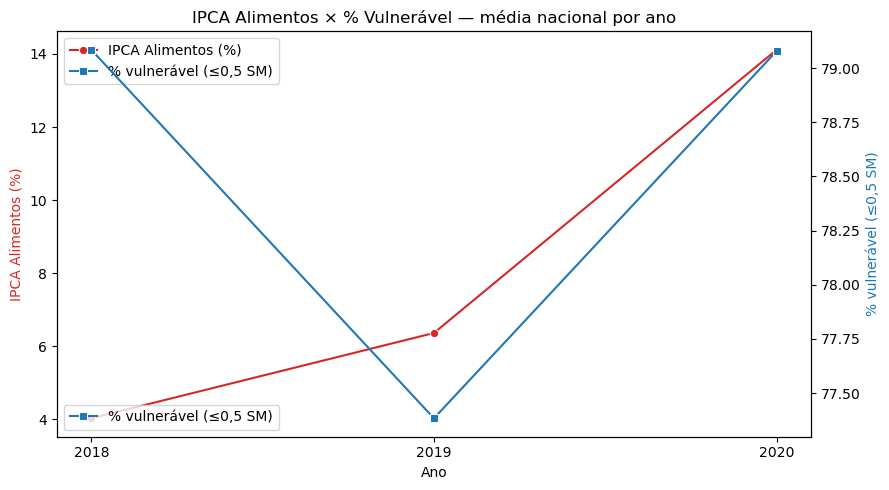

In [69]:
import matplotlib.ticker as mticker

# média por ano e ordenação
serie = (d.groupby("ano")[["ipca_alimentos_bebidas","perc_rf_ate_meio_sm"]]
           .mean()
           .reset_index()
           .sort_values("ano")
           .copy())

# garantir inteiro no eixo X
serie["ano"] = serie["ano"].astype(int)

fig, ax1 = plt.subplots(figsize=(9,5))
ax2 = ax1.twinx()

# curvas
sns.lineplot(data=serie, x="ano", y="ipca_alimentos_bebidas",
             marker="o", color="tab:red", label="IPCA Alimentos (%)", ax=ax1)
sns.lineplot(data=serie, x="ano", y="perc_rf_ate_meio_sm",
             marker="s", color="tab:blue", label="% vulnerável (≤0,5 SM)", ax=ax2)

# eixo X sem casas decimais
ax1.set_xticks(serie["ano"].unique())
ax1.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))

# rótulos
ax1.set_xlabel("Ano")
ax1.set_ylabel("IPCA Alimentos (%)", color="tab:red")
ax2.set_ylabel("% vulnerável (≤0,5 SM)", color="tab:blue")
plt.title("IPCA Alimentos × % Vulnerável — média nacional por ano")

# legendas limpas
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc="upper left")

plt.tight_layout()
plt.show()


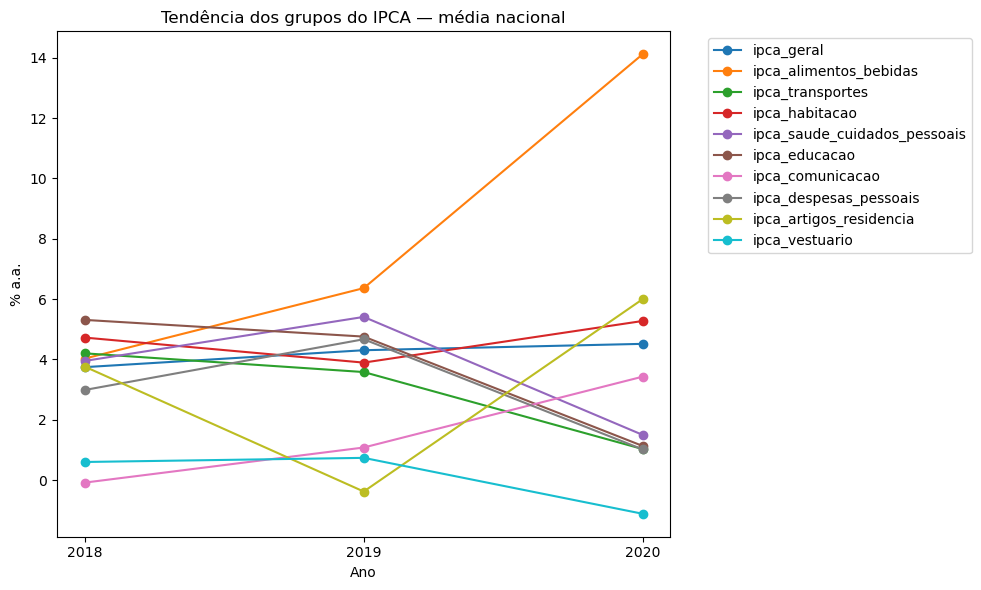

In [12]:
grupos = [
    "ipca_geral", "ipca_alimentos_bebidas", "ipca_transportes", "ipca_habitacao",
    "ipca_saude_cuidados_pessoais", "ipca_educacao", "ipca_comunicacao",
    "ipca_despesas_pessoais", "ipca_artigos_residencia", "ipca_vestuario"
]

# calcular média por ano
serie = df.groupby("ano")[grupos].mean().reset_index().sort_values("ano")
serie["ano"] = serie["ano"].astype(int)

# plot
fig, ax = plt.subplots(figsize=(10,6))
serie.set_index("ano").plot(marker="o", ax=ax)
ax.set_xlabel("Ano")
ax.set_ylabel("% a.a.")
ax.set_title("Tendência dos grupos do IPCA — média nacional")
ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

# garantir apenas anos inteiros no eixo X
ax.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
ax.set_xticks(serie["ano"].unique())

plt.tight_layout()
plt.show()


<Axes: >

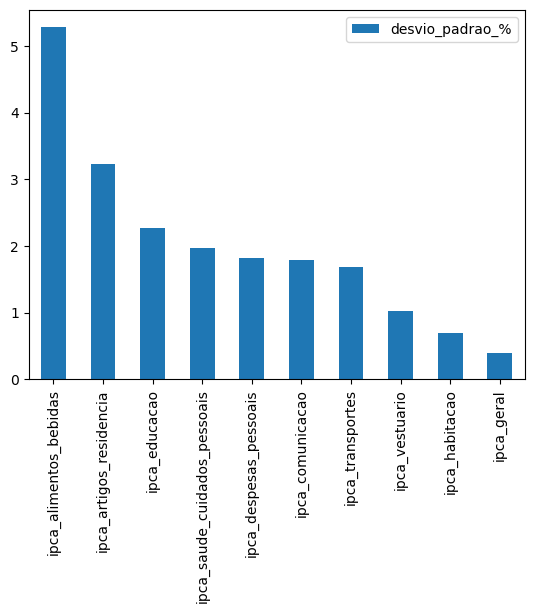

In [13]:
#quais artigos tem maior volatilidade
vol = df.groupby("ano")[grupos].mean().std().sort_values(ascending=False)
vol.to_frame("desvio_padrao_%").plot(kind="bar")


## Análise de cluster

Agrupar municipios com padrões semelhantes de vulnerabilidade social + PIB setorial . Ex: alta industria e alta pobreza

Agrupar municipios com padrões semelhantes de emprego formal. Ex: alta industria e baixo emprego formal


In [14]:
from pathlib import Path

# Caminho do arquivo Excel
df = pd.read_excel(Path("df_join_final.xlsx"))

# Colunas principais
pop_col = 'Pop_2020'
muni_id_col = 'cod_ibge'
year_col = 'ano' if 'ano' in df.columns else None

# Função para calcular métricas por 1.000 habitantes
def per_1000(num, den):
    num = pd.to_numeric(num, errors='coerce')
    den = pd.to_numeric(den, errors='coerce')
    s = num.div(den).mul(1000)
    s[(den<=0) | (~np.isfinite(den))] = np.nan
    return s


Ideia: Calcular a razão entre o PIB industrial per capita e a renda media para medir o descolamento entre geração de riqueza e bem-estar local.

 Cálculo da razão **PIB industrial / renda formal**

Este trecho calcula o quanto a **produção industrial média por habitante** supera a **renda média formal por trabalhador** em cada município.

1. **`pib_ind_pc`**  calcula o **PIB industrial per capita**, dividindo o PIB da indústria (`pib_industria`) pela população total (`Pop_2020`).  
   🔹 *Padronização:* per capita — valor por habitante.

2. **`per_capita_massa_rendimentos`**  obtém a **renda média formal por vínculo**, dividindo a massa total de rendimentos formais (`massa_rendimentos_num`) pelo número de empregos formais (`emprego_formal`).  
   🔹 *Padronização:* por vínculo — valor médio recebido por trabalhador formal.

3. **`razao_pib_renda`** → representa a relação entre as duas medidas:

   \[
   \text{razao\_pib\_renda} = \frac{\text{PIB industrial per capita}}{\text{renda média formal por vínculo}}
   \]

   🔹 Valores acima de **1** indicam que a produção industrial média por habitante é maior que a renda média formal de cada trabalhador — sugerindo **maior intensidade produtiva** da indústria local.

4. O código remove valores extremos (`inf` ou `NaN`) e ordena o resultado para listar os municípios com as **maiores razões PIB/renda** — ou seja, onde o **PIB industrial por habitante** mais se distancia dos salários médios formais.


In [ ]:
 #Colunas relevantes 
pop_col = 'Pop_2020'          # população total
pib_ind_col = 'pib_industria' # PIB da indústria
pop_formal = 'emprego_formal'  # população com emprego formal


# 1) Calcular PIB industrial per capita
df['pib_ind_pc'] = df[pib_ind_col] / df[pop_col]

# 2) Calcular renda media aproximada 
df['per_capita_massa_rendimentos'] = df['massa_rendimentos_num'] / df[pop_formal]

# 3) Calcular a razão PIB_industrial_per_capita / renda_media_formal 
df['razao_pib_renda'] = df['pib_ind_pc'] / df['per_capita_massa_rendimentos']

# 4) Limpar valores extremos ou inválidos 
df['razao_pib_renda'] = df['razao_pib_renda'].replace([np.inf, -np.inf], np.nan)

# 5) Visualizar (incluindo nome da cidade)
df_result = df[['cod_ibge', 'localidade', 'ano', 'pib_ind_pc',
                'per_capita_massa_rendimentos', 'razao_pib_renda']].copy()

df_result_sorted = df_result.sort_values(by='razao_pib_renda', ascending=False)
df_result_sorted.head(20)



,cod_ibge,localidade,ano,pib_ind_pc,per_capita_massa_rendimentos,razao_pib_renda
232,3520400,Ilhabela,2018,303273.385928,2641.348492,114.817635
877,3520400,Ilhabela,2019,309557.847027,2855.257404,108.416792
503,3544905,Sales Oliveira,2018,192852.066505,2115.587146,91.157704
1522,3520400,Ilhabela,2020,212576.800209,2989.092337,71.117509
245,3521408,Iracemápolis,2018,166226.889786,2807.902067,59.199675
1759,3541802,Queiroz,2020,127759.842635,2200.553629,58.058045
1482,3516853,Gavião Peixoto,2020,235611.426898,5745.851044,41.005488
1786,3544251,Rosana,2020,101339.159515,2566.603273,39.483765
1700,3536505,Paulínia,2020,175597.134029,4525.639489,38.800513
1055,3536505,Paulínia,2019,165084.637252,4330.672889,38.119858


In [16]:
#= 1,0	PIB industrial per capita está no mesmo patamar da renda média: equilíbrio
#> 1,0 (até 3)	Indústria gera mais riqueza do que se reflete nos salários: leve descolamento
#≫ 3,0	Forte descolamento: alta produção industrial sem correspondência em renda local
#< 1,0	Renda média é relativamente alta em relação ao PIB industrial (ex.: serviços, transferências, aposentadorias)

In [17]:
# Considera apenas valores válidos (não nulos)
validos = df_result['razao_pib_renda'].dropna()

# 1) Porcentagem de municípios com razão > 3
perc_maior_3 = (validos > 3).mean() * 100

# 2) Quantidade absoluta
qtd_maior_3 = (validos > 3).sum()

# 3) Média geral da razão
media_razao = validos.mean()

# 4) Exibir resultados
print(f"Média geral da razão PIB/Renda: {media_razao:.2f}")
print(f"{perc_maior_3:.2f}% dos municípios ({qtd_maior_3} no total) têm razão PIB/Renda maior que 3")


Média geral da razão PIB/Renda: 3.10
29.46% dos municípios (570 no total) têm razão PIB/Renda maior que 3


No setor industrial

In [18]:

ANO_ALVO = None                 # ex.: 2020; se None, usa o ano mais recente
MIN_EMPREGOS_FORMAIS = 1_000    # evita distorções com poucos vínculos
MIN_POP = 10_000                # evita distorções em municípios minúsculos
LIMIAR_RAZAO = 3                # seu corte de interesse (> 3)

pop_col = 'Pop_2020'
pib_ind_col = 'pib_industria'
emp_formal_col = 'emprego_formal'
massa_col = 'massa_rendimentos_num'

# ---------------------- Recorte de ano ----------------------
df_ = df.copy()
if ANO_ALVO is None:
    ANO_ALVO = int(df_["ano"].max())
df_ = df_.loc[df_["ano"] == ANO_ALVO].copy()

# ---------------------- Métricas (Definição B) ----------------------
# Padronizações:
# - per capita: ÷ Pop_2020
# - por vínculo: ÷ emprego_formal
df_["pib_ind_pc"]        = df_[pib_ind_col] / df_[pop_col]          # R$ por habitante
df_["renda_media_vinc"]  = df_[massa_col]     / df_[emp_formal_col] # R$ por vínculo

df_["razao_pib_renda"]   = df_["pib_ind_pc"] / df_["renda_media_vinc"]

# ---------------------- Limpeza / Robustez ----------------------
df_ = df_.replace([np.inf, -np.inf], np.nan)
df_ = df_.dropna(subset=["pib_ind_pc","renda_media_vinc","razao_pib_renda"])

# Filtros de base populacional e de vínculos
df_ = df_.loc[(df_[emp_formal_col] >= MIN_EMPREGOS_FORMAIS) & (df_[pop_col] >= MIN_POP)].copy()

# (Opcional) aparar 1% de extremos da razão para evitar outliers bizarros
q_low, q_high = df_["razao_pib_renda"].quantile([0.01, 0.99])
df_["razao_pib_renda_clip"] = df_["razao_pib_renda"].clip(lower=q_low, upper=q_high)

# ---------------------- Seleções pedidas 
# Municípios com razão > LIMIAR_RAZAO
sel = df_["razao_pib_renda"] > LIMIAR_RAZAO
df_result = df_.loc[sel, ["cod_ibge","localidade","ano", pop_col,
                          "pib_ind_pc","renda_media_vinc","razao_pib_renda"]].copy()

# a) Maiores por população dentre os que têm razão > limiar
top_maiores = df_result.sort_values(by=pop_col, ascending=False).head(50)

# b) Maiores razões (inspeção)
top_razoes = df_result.sort_values(by="razao_pib_renda", ascending=False).head(50)

# Exibir tabelas completas (sem truncar colunas)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)


# Mostrar a tabela normalmente
top_maiores.head(20)


,cod_ibge,localidade,ano,Pop_2020,pib_ind_pc,renda_media_vinc,razao_pib_renda
1502,3518800,Guarulhos,2020,1351275,9824.728732,3072.577936,3.197552
1834,3548708,São Bernardo do Campo,2020,812086,12263.102882,3480.406552,3.523469
1847,3549904,São José dos Campos,2020,710654,18975.440273,3394.634016,5.589834
1824,3547809,Santo André,2020,693867,10277.054816,2815.553799,3.650101
1871,3552205,Sorocaba,2020,658547,12750.175763,3025.773022,4.213857
1620,3529401,Mauá,2020,460132,12547.212961,2972.905329,4.220522
1633,3530607,Mogi das Cruzes,2020,432905,8769.043682,2579.221982,3.399879
1583,3525904,Jundiaí,2020,407016,24198.951255,3386.765763,7.145151
1442,3513801,Diadema,2020,404477,9773.648062,3087.727292,3.165321
1723,3538709,Piracicaba,2020,389873,17616.614639,3120.216331,5.645959


Considerando o PIB total

In [19]:

# ---------------------- Parâmetros ----------------------
ANO_ALVO = None                 # ex.: 2020; se None, usa o ano mais recente
MIN_EMPREGOS_FORMAIS = 1_000    # robustez: evita razão inflada com poucos vínculos
MIN_POP = 10_000                # robustez: evita municípios minúsculos
LIMIAR_RAZAO = 3                # corte de interesse (> 3)

pop_col = 'Pop_2020'
emp_formal_col = 'emprego_formal'
massa_col = 'massa_rendimentos_num'

# ---------------------- Recorte de ano ----------------------
df_ = df.copy()
if ANO_ALVO is None:
    ANO_ALVO = int(df_['ano'].max())
df_ = df_.loc[df_['ano'] == ANO_ALVO].copy()

# ---------------------- Métricas (Definição B) ----------------------
# Denominador: renda média por vínculo (÷ emprego formal)
df_['renda_media_vinc'] = np.where(
    df_[emp_formal_col].gt(0),
    df_[massa_col] / df_[emp_formal_col],
    np.nan
)

# Numerador: PIB TOTAL per capita (÷ Pop_2020)
df_['pib_total_pc'] = np.where(
    df_[pop_col].gt(0),
    df_['pib'] / df_[pop_col],
    np.nan
)

# Razão: (PIB total per capita) / (renda média por vínculo)
df_['razao_pib_renda'] = df_['pib_total_pc'] / df_['renda_media_vinc']

# ---------------------- Limpeza / Robustez ----------------------
df_ = df_.replace([np.inf, -np.inf], np.nan)
df_ = df_.dropna(subset=['pib_total_pc','renda_media_vinc','razao_pib_renda'])

# Filtros mínimos
df_ = df_.loc[
    (df_[emp_formal_col] >= MIN_EMPREGOS_FORMAIS) &
    (df_[pop_col] >= MIN_POP)
].copy()

# (Opcional) aparar 1% de extremos
q_low, q_high = df_['razao_pib_renda'].quantile([0.01, 0.99])
df_['razao_pib_renda_clip'] = df_['razao_pib_renda'].clip(lower=q_low, upper=q_high)

# ---------------------- Seleções pedidas ----------------------
# Municípios com razão > LIMIAR_RAZAO
sel = df_['razao_pib_renda'] > LIMIAR_RAZAO
df_result = df_.loc[sel, ['cod_ibge','localidade','ano', pop_col,
                          'pib_total_pc','renda_media_vinc','razao_pib_renda']].copy()

# a) Maiores por população
top_maiores = df_result.sort_values(by=pop_col, ascending=False).head(50)

# b) Maiores razões
top_razoes = df_result.sort_values(by='razao_pib_renda', ascending=False).head(50)

# ---------------------- Exibir ----------------------
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

top_maiores.head(20)
# Para ver também:
# top_razoes.head(20)


,cod_ibge,localidade,ano,Pop_2020,pib_total_pc,renda_media_vinc,razao_pib_renda
1852,3550308,São Paulo,2020,11869660,63081.756930,4054.584981,15.558129
1502,3518800,Guarulhos,2020,1351275,48731.243383,3072.577936,15.860051
1398,3509502,Campinas,2020,1175501,55652.625405,3816.434023,14.582363
1834,3548708,São Bernardo do Campo,2020,812086,59863.539150,3480.406552,17.200157
1847,3549904,São José dos Campos,2020,710654,55087.302427,3394.634016,16.227759
1824,3547809,Santo André,2020,693867,42429.567427,2815.553799,15.069706
1777,3543402,Ribeirão Preto,2020,683777,51506.367134,2792.983576,18.441343
1677,3534401,Osasco,2020,680964,112064.387717,3333.413211,33.618511
1871,3552205,Sorocaba,2020,658547,55764.841920,3025.773022,18.429949
1620,3529401,Mauá,2020,460132,37222.759069,2972.905329,12.520667


Análise por setor, cidade e ano

In [71]:
# --- Parâmetros 
pop_col = 'Pop_2020'           # população total
pib_ind_col = 'pib_industria'  # (mantido, caso queira comparar depois)
pop_formal = 'emprego_formal'  # vínculos formais (denominador da renda média)
rend_col = 'massa_rendimentos_num'

# --- Setores (mantém só os que existem no df) ---
setor_cols = [
    "pib_agropecuaria",
    "pib_industria",
    "pib_servicos",
    "pib_servicos_adm_publica",
    "pib_impostos_liq_sub",
    #"pib",  # total
]
setor_cols = [c for c in setor_cols if c in df.columns]

# --- 1) Renda média por vínculo
df['per_capita_massa_rendimentos'] = np.where(
    df[pop_formal].gt(0), df[rend_col] / df[pop_formal], np.nan
)

# --- 2) PIB per capita por setor (÷ Pop_2020) ---
for col in setor_cols:
    df[f'per_capita_{col}'] = np.where(
        df[pop_col].gt(0), df[col] / df[pop_col], np.nan
    )

# --- 3) Tabela longa por setor, incluindo NOME DO MUNICÍPIO ---
meta_cols = [c for c in ['cod_ibge','localidade','ano'] if c in df.columns]
long_rows = []
for col in setor_cols:
    pc_col = f'per_capita_{col}'
    tmp = df[meta_cols + [pc_col, 'per_capita_massa_rendimentos']].copy()
    tmp = tmp.rename(columns={
        pc_col: 'pib_setor_pc',
        'per_capita_massa_rendimentos': 'renda_media_vinc'
    })
    tmp['setor'] = col.replace('pib_', '')
    # razão = (PIB setorial per capita) / (renda média por vínculo)
    tmp['razao_pib_renda'] = tmp['pib_setor_pc'] / tmp['renda_media_vinc']
    tmp['razao_pib_renda'] = tmp['razao_pib_renda'].replace([np.inf,-np.inf], np.nan)
    long_rows.append(tmp)

df_long = pd.concat(long_rows, ignore_index=True)

# --- 4) Resumo por setor (média e % > 3) ---
def resumo_setor(g):
    valid = g['razao_pib_renda'].dropna()
    return pd.Series({
        'n_validos': int(valid.shape[0]),
        'media_razao': valid.mean(),
        'perc_maior_3': (valid > 3).mean()*100 if len(valid) else np.nan,
        'qtd_maior_3': int((valid > 3).sum()),
    })

resumo = df_long.groupby('setor', as_index=False).apply(resumo_setor)
resumo = resumo.sort_values('media_razao', ascending=False)

# --- 5) Top 10 municípios com maior razão em cada setor ---
tops = (df_long.sort_values(['setor','razao_pib_renda'], ascending=[True,False])
               .groupby('setor').head(10).reset_index(drop=True))

# --- 6) Exibição/Export ---
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

print("\n=== RESUMO POR SETOR (média da razão e % > 3) ===")
print(resumo)

print("\n=== TOP 10 MUNICÍPIOS POR SETOR (com localidade) ===")
print(tops[meta_cols + ['setor','pib_setor_pc','renda_media_vinc','razao_pib_renda']].head(30))

# (opcional) salvar csvs
df_long.to_csv("razao_setorial_por_municipio_defB.csv", index=False, encoding="utf-8")
resumo.to_csv("resumo_razao_setorial_defB.csv", index=False, encoding="utf-8")
tops.to_csv("top10_razao_por_setor_defB.csv", index=False, encoding="utf-8")



=== RESUMO POR SETOR (média da razão e % > 3) ===
                  setor  n_validos  media_razao  perc_maior_3  qtd_maior_3
3              servicos     1935.0     6.245763     88.062016       1704.0
2             industria     1935.0     3.097164     29.457364        570.0
4  servicos_adm_publica     1935.0     2.246420     12.558140        243.0
0          agropecuaria     1935.0     2.041050     22.635659        438.0
1      impostos_liq_sub     1935.0     1.432435      8.940568        173.0

=== TOP 10 MUNICÍPIOS POR SETOR (com localidade) ===
    cod_ibge            localidade   ano             setor   pib_setor_pc  renda_media_vinc  razao_pib_renda
0    3510906  Cássia dos Coqueiros  2020      agropecuaria   73469.290982       1893.798417        38.794673
1    3510906  Cássia dos Coqueiros  2019      agropecuaria   48557.027255       1909.571374        25.428234
2    3510906  Cássia dos Coqueiros  2018      agropecuaria   39486.713427       1598.088482        24.708715
3    3504

C:\Users\marcos\AppData\Local\Temp\ipykernel_15376\4232513376.py:57: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  resumo = df_long.groupby('setor', as_index=False).apply(resumo_setor)


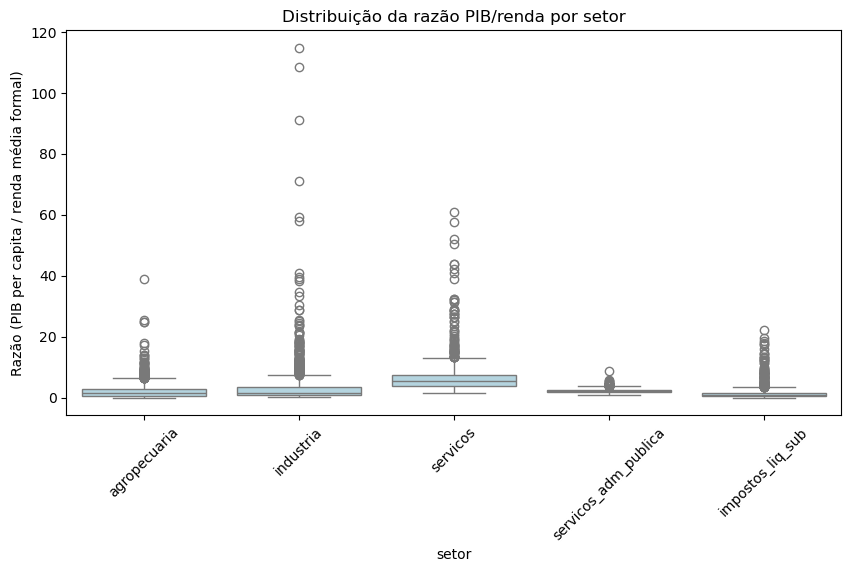

In [21]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_long, x='setor', y='razao_pib_renda', color='lightblue')
plt.xticks(rotation=45)
plt.title("Distribuição da razão PIB/renda por setor")
plt.ylabel("Razão (PIB per capita / renda média formal)")
plt.show()


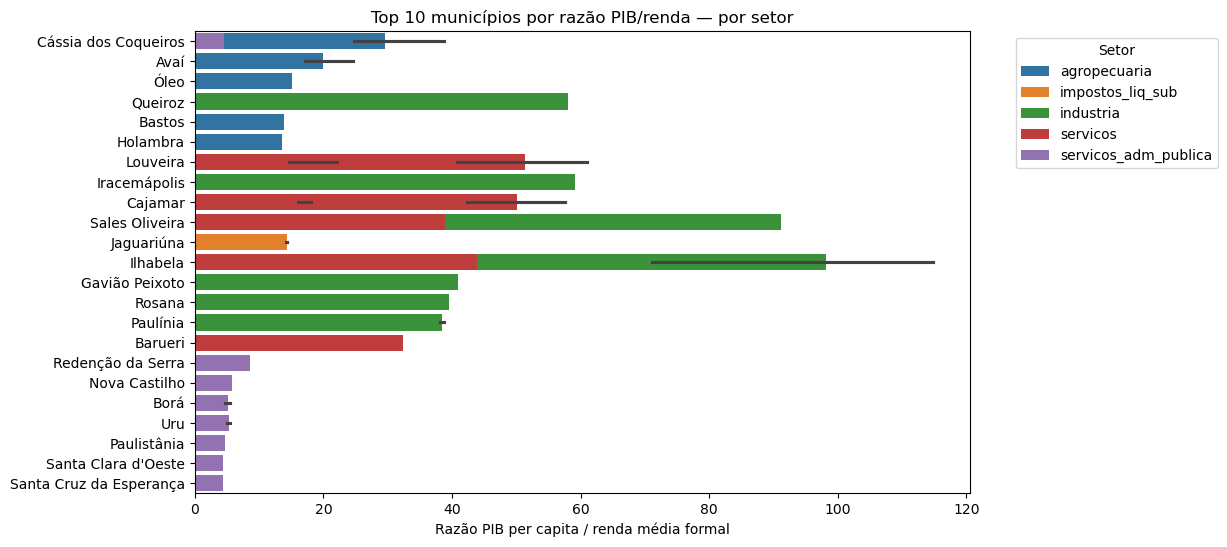

In [22]:
plt.figure(figsize=(10,6))
sns.barplot(data=tops, y='localidade', x='razao_pib_renda', hue='setor', dodge=False)
plt.title("Top 10 municípios por razão PIB/renda — por setor")
plt.xlabel("Razão PIB per capita / renda média formal")
plt.ylabel("")
plt.legend(title="Setor", bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()


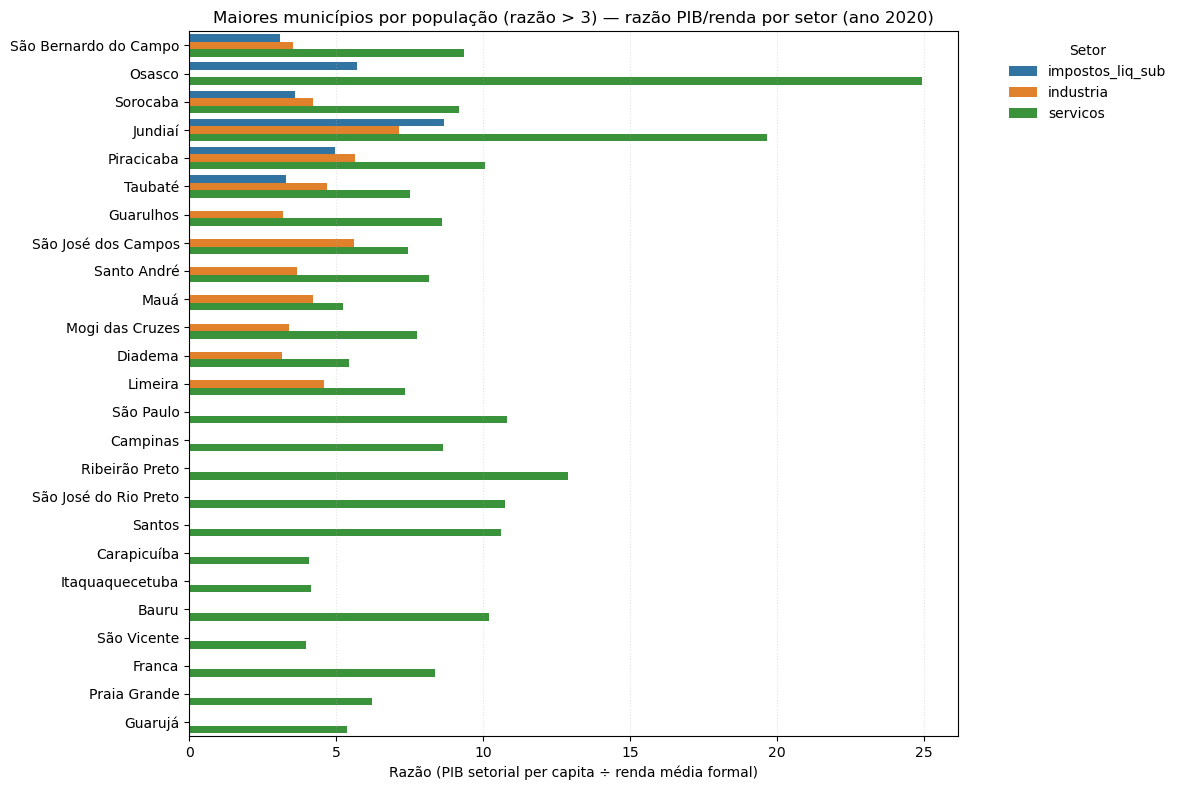

In [70]:

# ====================== PARÂMETROS ======================
ANO_ALVO = None               # ex.: 2020; se None, usa o ano mais recente
MIN_EMPREGOS_FORMAIS = 1_000  # robustez mínima
MIN_POP = 10_000              # robustez mínima
TOP_MUNS = 25                 # nº de municípios mais populosos a exibir
APPLY_LIMIAR = True           # aplicar corte de razão?
LIMIAR_RAZAO = 3              # usado se APPLY_LIMIAR=True

pop_col = "Pop_2020"
emp_formal_col = "emprego_formal"
massa_col = "massa_rendimentos_num"

# Setores existentes no df
setor_cols = [c for c in [
    "pib_agropecuaria","pib_industria","pib_servicos",
    "pib_servicos_adm_publica","pib_impostos_liq_sub"
] if c in df.columns]

# ====================== RECORTE DE ANO ======================
df_ = df.copy()
if ANO_ALVO is None:
    ANO_ALVO = int(df_["ano"].max())
df_ = df_.loc[df_["ano"] == ANO_ALVO].copy()

# ====================== MÉTRICAS (Definição B por SETOR) ======================
# AVISO: Numerador per capita (÷ Pop_2020); Denominador por vínculo (÷ emprego_formal)
df_["renda_media_vinc"] = np.where(
    df_[emp_formal_col].gt(0),
    df_[massa_col] / df_[emp_formal_col],
    np.nan
)

for col in setor_cols:
    df_[f"{col}_pc"] = np.where(
        df_[pop_col].gt(0),
        df_[col] / df_[pop_col],
        np.nan
    )

meta_cols = [c for c in ["cod_ibge","localidade","ano"] if c in df_.columns]
rows = []
for col in setor_cols:
    pc_col = f"{col}_pc"
    tmp = df_[meta_cols + [pop_col, emp_formal_col, pc_col, "renda_media_vinc"]].copy()
    tmp = tmp.rename(columns={pc_col: "pib_setor_pc"})
    tmp["setor"] = col.replace("pib_", "")
    tmp["razao_pib_renda"] = tmp["pib_setor_pc"] / tmp["renda_media_vinc"]
    tmp["razao_pib_renda"] = tmp["razao_pib_renda"].replace([np.inf, -np.inf], np.nan)
    rows.append(tmp)

df_long = pd.concat(rows, ignore_index=True)

# Robustez mínima
df_long = df_long.loc[
    (df_long[emp_formal_col] >= MIN_EMPREGOS_FORMAIS) &
    (df_long[pop_col] >= MIN_POP)
].dropna(subset=["pib_setor_pc","renda_media_vinc","razao_pib_renda"])

# ====================== CONJUNTO FIXO: MAIORES POR POPULAÇÃO ======================
# Pega TOP_MUNS municípios mais populosos (no ano alvo) e usa TODOS os setores deles
mun_top = (df_long.sort_values(pop_col, ascending=False)
                  .drop_duplicates("cod_ibge")
                  .head(TOP_MUNS))[["cod_ibge","localidade"]]

plot_df = df_long.merge(mun_top, on=["cod_ibge","localidade"])

# (opcional) aplicar limiar de razão
if APPLY_LIMIAR:
    plot_df = plot_df.loc[plot_df["razao_pib_renda"] > LIMIAR_RAZAO].copy()

# ====================== GRÁFICO ======================
plt.figure(figsize=(12, 8))
sns.barplot(
    data=plot_df.sort_values([ "setor", pop_col ], ascending=[ True, False ]),
    y="localidade", x="razao_pib_renda", hue="setor", dodge=True
)

titulo_limiar = f" (razão > {LIMIAR_RAZAO})" if APPLY_LIMIAR else ""
plt.title(f"Maiores municípios por população{titulo_limiar} — razão PIB/renda por setor (ano {ANO_ALVO})")
plt.xlabel("Razão (PIB setorial per capita ÷ renda média formal)")
plt.ylabel("")
plt.legend(title="Setor", bbox_to_anchor=(1.05, 1), loc="upper left", frameon=False)
plt.grid(axis="x", linestyle=":", alpha=0.35)
plt.tight_layout()
plt.show()

# ====================== (Opcional) DIAGNÓSTICO: por que algum município/setor não aparece? ======================
# Descomente para inspecionar regras que excluíram linhas:
# diag = df_long.copy()
# diag["tem_dado"] = diag[["pib_setor_pc","renda_media_vinc","razao_pib_renda"]].notna().all(axis=1)
# diag["passa_pop"] = diag[pop_col] >= MIN_POP
# diag["passa_emp"] = diag[emp_formal_col] >= MIN_EMPREGOS_FORMAIS
# diag["passa_razao"] = diag["razao_pib_renda"] > LIMIAR_RAZAO
# check = (diag.merge(mun_top, on=["cod_ibge","localidade"])
#               .groupby(["localidade","setor"])[["tem_dado","passa_pop","passa_emp","passa_razao"]]
#               .max()
#               .reset_index())
# display(check.head(30))


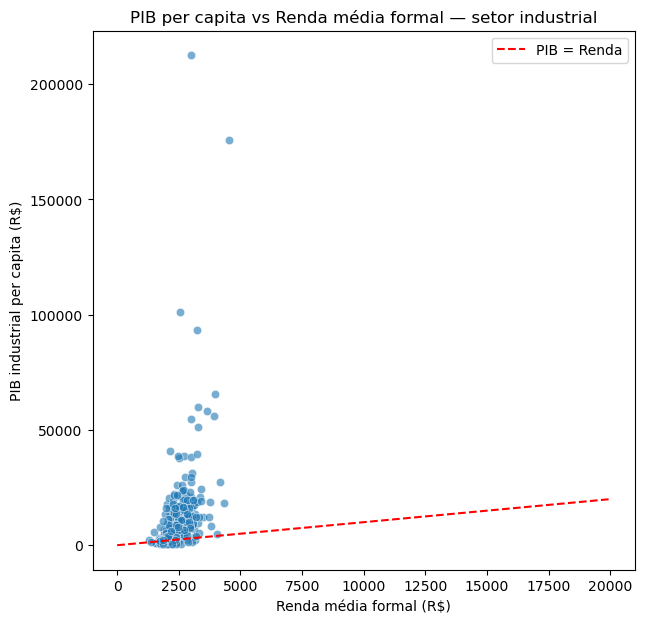

In [24]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=df_long[df_long["setor"]=="industria"],
                x="renda_media_vinc", y="pib_setor_pc", alpha=0.6)
plt.plot([0,20000],[0,20000], color='red', linestyle='--', label='PIB = Renda')
plt.xlabel("Renda média formal (R$)")
plt.ylabel("PIB industrial per capita (R$)")
plt.title("PIB per capita vs Renda média formal — setor industrial")
plt.legend()
plt.show()
#Cada ponto é um município; a linha y=x indicaria equilíbrio.


## Analisar impacto 

Presença de BPC × envelhecimento populacional

## Exploração inicial

In [25]:
df.Pop_2020.describe()

count    1.935000e+03
mean     6.920915e+04
std      4.799387e+05
min      8.120000e+02
25%      5.534000e+03
50%      1.331900e+04
75%      4.107300e+04
max      1.186966e+07
Name: Pop_2020, dtype: float64

In [26]:
df.query('localidade == "São Paulo"')

,ano,cod_ibge,emprego_formal,emp_c_sal,massa_rendimentos_num,qtd_formal_Administração_Pública,qtd_formal_Agropecuária,qtd_formal_Alojamento_e_Alimentação,qtd_formal_Artes_e_Cultura,qtd_formal_Atividades_Imobiliárias,qtd_formal_Atividades_Profissionais_e_Técnicas,qtd_formal_Comércio,qtd_formal_Construção,qtd_formal_Educação,qtd_formal_Eletricidade_e_Gás,qtd_formal_Indústria_de_Transformação,qtd_formal_Indústrias_Extrativas,qtd_formal_Informação_e_Comunicação,qtd_formal_Organismos_Internacionais,qtd_formal_Outros_Serviços,qtd_formal_Saneamento_e_Resíduos,qtd_formal_Saúde,qtd_formal_Serviços_Administrativos,qtd_formal_Serviços_Domésticos,qtd_formal_Serviços_Financeiros,qtd_formal_Transporte_e_Correios,qtd_formal_escolaridade_0,qtd_formal_escolaridade_1,qtd_formal_escolaridade_2,qtd_formal_escolaridade_3,qtd_formal_escolaridade_4,ipca_alimentos_bebidas,ipca_artigos_residencia,ipca_comunicacao,ipca_despesas_pessoais,ipca_educacao,ipca_habitacao,ipca_saude_cuidados_pessoais,ipca_transportes,ipca_vestuario,ipca_geral,localidade,pib_agropecuaria,pib_impostos_liq_sub,pib_industria,pib,pib_servicos,pib_servicos_adm_publica,pib_valor_add,n_fam_rua,pes_rf_ate_meio_sm,pes_insc_cadun,perc_rf_ate_meio_sm,Pes_PBF,Fam_PBF,MapSeq,F_CAD_EP,Fam_Aux,Fam_PBF_Aux,Fam_PBF_2,MapSeq_Aux,PCD_BPC,Ido_BPC,Pop_65_mais,Pop_2020,65_menos_Idoso_BPC,pib_ind_pc,per_capita_massa_rendimentos,razao_pib_renda,per_capita_pib_agropecuaria,per_capita_pib_industria,per_capita_pib_servicos,per_capita_pib_servicos_adm_publica,per_capita_pib_impostos_liq_sub
562,2018,3550308,4903449,4739122,1.929714e+10,751229,2433,242890,35428,23674,191303,863463,226721,219788,6837,334124,1489,175645,640,119552,23338,357033,875122,70,200394,252276,6566,296602,582769,2415123,1602389,4.030782,3.759616,-0.080826,2.989517,5.310920,4.724189,3.951694,4.202469,0.602078,3.745482,São Paulo,36419777,127157037150,58064987762,714663604042,485395448600,44009710753,587506566893,30853,2436563,3134152,"77,7",1.345828e+06,490938.583333,3.000000,438560.666667,NaN,490938.583333,NaN,NaN,80141.916667,126148.333333,1259189,11869660,1.133041e+06,4891.882982,3935.422438,1.243039,3.068308,4891.882982,40893.795492,3707.748221,10712.778390
1207,2019,3550308,4981557,4602207,1.968816e+10,764179,2274,246555,31351,24154,201985,852812,233209,222046,5598,320850,1103,191178,665,113835,25393,356113,895303,89,245008,247857,9250,281978,553032,2522557,1614740,6.364091,-0.377431,1.081717,4.669742,4.757728,3.895636,5.410017,3.582840,0.738737,4.306040,São Paulo,41807827,132475060795,57130706301,763597807913,528404124837,45546108154,631122747118,33292,2484011,3322612,"74,8",1.208909e+06,451383.833333,3.166667,446026.333333,NaN,451383.833333,NaN,NaN,81394.166667,126805.916667,1259189,11869660,1.132383e+06,4813.171254,3952.209292,1.217843,3.522243,4813.171254,44517.208146,3837.187262,11160.813435
1852,2020,3550308,4845415,4419505,1.964615e+10,733423,2482,190227,27324,24509,207530,807254,252604,207339,5685,304853,1048,192818,610,105021,26316,373600,927672,47,220563,234490,9173,259843,500902,2484392,1591105,14.113456,5.996319,3.428847,1.021320,1.134802,5.274873,1.501329,1.031892,-1.113577,4.517342,São Paulo,61896381,124349145812,58077783601,748759006965,520357968893,45912212278,624409861153,33443,2519988,3252133,"77,5",1.250882e+06,458208.250000,3.250000,471573.000000,NaN,458208.250000,NaN,NaN,79810.000000,127839.666667,1259189,11869660,1.131349e+06,4892.961012,4054.584981,1.206772,5.214672,4892.961012,43839.332289,3868.030953,10476.218006


In [27]:
df.describe()

,ano,cod_ibge,emprego_formal,emp_c_sal,massa_rendimentos_num,qtd_formal_Administração_Pública,qtd_formal_Agropecuária,qtd_formal_Alojamento_e_Alimentação,qtd_formal_Artes_e_Cultura,qtd_formal_Atividades_Imobiliárias,qtd_formal_Atividades_Profissionais_e_Técnicas,qtd_formal_Comércio,qtd_formal_Construção,qtd_formal_Educação,qtd_formal_Eletricidade_e_Gás,qtd_formal_Indústria_de_Transformação,qtd_formal_Indústrias_Extrativas,qtd_formal_Informação_e_Comunicação,qtd_formal_Organismos_Internacionais,qtd_formal_Outros_Serviços,qtd_formal_Saneamento_e_Resíduos,qtd_formal_Saúde,qtd_formal_Serviços_Administrativos,qtd_formal_Serviços_Domésticos,qtd_formal_Serviços_Financeiros,qtd_formal_Transporte_e_Correios,qtd_formal_escolaridade_0,qtd_formal_escolaridade_1,qtd_formal_escolaridade_2,qtd_formal_escolaridade_3,qtd_formal_escolaridade_4,ipca_alimentos_bebidas,ipca_artigos_residencia,ipca_comunicacao,ipca_despesas_pessoais,ipca_educacao,ipca_habitacao,ipca_saude_cuidados_pessoais,ipca_transportes,ipca_vestuario,ipca_geral,pib_agropecuaria,pib_impostos_liq_sub,pib_industria,pib,pib_servicos,pib_servicos_adm_publica,pib_valor_add,n_fam_rua,pes_rf_ate_meio_sm,pes_insc_cadun,Pes_PBF,Fam_PBF,MapSeq,F_CAD_EP,Fam_Aux,Fam_PBF_Aux,Fam_PBF_2,MapSeq_Aux,PCD_BPC,Ido_BPC,Pop_65_mais,Pop_2020,65_menos_Idoso_BPC,pib_ind_pc,per_capita_massa_rendimentos,razao_pib_renda,per_capita_pib_agropecuaria,per_capita_pib_industria,per_capita_pib_servicos,per_capita_pib_servicos_adm_publica,per_capita_pib_impostos_liq_sub
count,1935.000000,1.935000e+03,1.935000e+03,1.935000e+03,1.935000e+03,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.0000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1.935000e+03,1.935000e+03,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1.935000e+03,1.935000e+03,1.935000e+03,1.935000e+03,1.935000e+03,1.935000e+03,1.935000e+03,1935.000000,1.935000e+03,1.935000e+03,1.935000e+03,1935.000000,1935.000000,1935.000000,0.0,1935.000000,0.0,0.0,1935.000000,1935.000000,1.935000e+03,1.935000e+03,1.935000e+03,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000
mean,2019.000000,3.528698e+06,2.061378e+04,1.926917e+04,6.739725e+07,2449.996899,483.264599,886.192765,118.890956,76.570026,606.273385,4064.047545,853.805685,857.201550,42.824806,3387.266667,25.547804,514.706460,1.099742,449.963307,143.303876,1257.204134,2659.5323,0.609302,578.796382,1156.682171,41.489406,1494.934367,2691.390698,1.140431e+04,4.981660e+03,8.169443,3.126168,1.476579,2.893526,3.734483,4.631566,3.621013,2.939067,0.075746,4.189621,5.637394e+07,5.651583e+08,6.248683e+08,3.584775e+09,2.047208e+09,2.911660e+08,3.019616e+09,89.275452,1.304564e+04,1.646221e+04,7.024334e+03,2377.584582,3.307407,2201.798234,NaN,2377.584582,NaN,NaN,535.449096,618.596038,7.153194e+03,6.920915e+04,6.534598e+03,8089.352394,2294.175601,3.097164,4322.943097,8089.352394,15107.158543,4984.915119,3747.909046
std,0.816708,1.669169e+04,1.958894e+05,1.830493e+05,7.763601e+08,29542.198118,804.940076,9122.893916,1257.500132,957.073154,7974.992842,33875.286455,9469.913411,8745.542433,377.566239,14238.867121,130.333494,7453.455974,25.530481,4504.608807,1057.588456,14428.422048,35788.3897,4.132915,8815.318997,10165.523097,337.174961,11186.882352,21886.218807,9.926816e+04,6.348914e+04,4.310758,2.641025,1.460146,1.491393,1.852552,0.567014,1.613173,1.372451,0.843045,0.325770,7.933725e+07,5.199311e+09,2.741503e+09,3.000122e+10,2.052037e+10,1.836205e+09,2.481601e+10,1285.585812,9.930021e+04,1.293093e+05,5.105567e+04,18708.764663,0.685114,18105.952532,NaN,18708.764663,NaN,NaN,3249.757547,5074.143969,5.073399e+04,4.799387e+05,4.568199e+04,18309.851948,471.319475,6.139372,5058.521968,18309.851948,14947.261033,1231.370479,6241.684219
min,2

In [28]:
df = df.drop(columns = ['Fam_Aux',"Fam_PBF_2","MapSeq_Aux"])

### Participação de cada setor no emprego formal

In [29]:
emprego_cols = ['qtd_formal_Administração_Pública','qtd_formal_Agropecuária','qtd_formal_Alojamento_e_Alimentação','qtd_formal_Artes_e_Cultura','qtd_formal_Atividades_Imobiliárias','qtd_formal_Atividades_Profissionais_e_Técnicas','qtd_formal_Comércio','qtd_formal_Construção','qtd_formal_Educação','qtd_formal_Eletricidade_e_Gás','qtd_formal_Indústria_de_Transformação','qtd_formal_Indústrias_Extrativas','qtd_formal_Informação_e_Comunicação','qtd_formal_Organismos_Internacionais','qtd_formal_Outros_Serviços','qtd_formal_Saneamento_e_Resíduos','qtd_formal_Saúde','qtd_formal_Serviços_Administrativos','qtd_formal_Serviços_Domésticos','qtd_formal_Serviços_Financeiros','qtd_formal_Transporte_e_Correios',
                'qtd_formal_escolaridade_0','qtd_formal_escolaridade_1','qtd_formal_escolaridade_2','qtd_formal_escolaridade_3','qtd_formal_escolaridade_4']

for col in emprego_cols:
    df['taxa_' + col] = df[col] / df['emprego_formal']

In [30]:
df

,ano,cod_ibge,emprego_formal,emp_c_sal,massa_rendimentos_num,qtd_formal_Administração_Pública,qtd_formal_Agropecuária,qtd_formal_Alojamento_e_Alimentação,qtd_formal_Artes_e_Cultura,qtd_formal_Atividades_Imobiliárias,qtd_formal_Atividades_Profissionais_e_Técnicas,qtd_formal_Comércio,qtd_formal_Construção,qtd_formal_Educação,qtd_formal_Eletricidade_e_Gás,qtd_formal_Indústria_de_Transformação,qtd_formal_Indústrias_Extrativas,qtd_formal_Informação_e_Comunicação,qtd_formal_Organismos_Internacionais,qtd_formal_Outros_Serviços,qtd_formal_Saneamento_e_Resíduos,qtd_formal_Saúde,qtd_formal_Serviços_Administrativos,qtd_formal_Serviços_Domésticos,qtd_formal_Serviços_Financeiros,qtd_formal_Transporte_e_Correios,qtd_formal_escolaridade_0,qtd_formal_escolaridade_1,qtd_formal_escolaridade_2,qtd_formal_escolaridade_3,qtd_formal_escolaridade_4,ipca_alimentos_bebidas,ipca_artigos_residencia,ipca_comunicacao,ipca_despesas_pessoais,ipca_educacao,ipca_habitacao,ipca_saude_cuidados_pessoais,ipca_transportes,ipca_vestuario,ipca_geral,localidade,pib_agropecuaria,pib_impostos_liq_sub,pib_industria,pib,pib_servicos,pib_servicos_adm_publica,pib_valor_add,n_fam_rua,pes_rf_ate_meio_sm,pes_insc_cadun,perc_rf_ate_meio_sm,Pes_PBF,Fam_PBF,MapSeq,F_CAD_EP,Fam_PBF_Aux,PCD_BPC,Ido_BPC,Pop_65_mais,Pop_2020,65_menos_Idoso_BPC,pib_ind_pc,per_capita_massa_rendimentos,razao_pib_renda,per_capita_pib_agropecuaria,per_capita_pib_industria,per_capita_pib_servicos,per_capita_pib_servicos_adm_publica,per_capita_pib_impostos_liq_sub,taxa_qtd_formal_Administração_Pública,taxa_qtd_formal_Agropecuária,taxa_qtd_formal_Alojamento_e_Alimentação,taxa_qtd_formal_Artes_e_Cultura,taxa_qtd_formal_Atividades_Imobiliárias,taxa_qtd_formal_Atividades_Profissionais_e_Técnicas,taxa_qtd_formal_Comércio,taxa_qtd_formal_Construção,taxa_qtd_formal_Educação,taxa_qtd_formal_Eletricidade_e_Gás,taxa_qtd_formal_Indústria_de_Transformação,taxa_qtd_formal_Indústrias_Extrativas,taxa_qtd_formal_Informação_e_Comunicação,taxa_qtd_formal_Organismos_Internacionais,taxa_qtd_formal_Outros_Serviços,taxa_qtd_formal_Saneamento_e_Resíduos,taxa_qtd_formal_Saúde,taxa_qtd_formal_Serviços_Administrativos,taxa_qtd_formal_Serviços_Domésticos,taxa_qtd_formal_Serviços_Financeiros,taxa_qtd_formal_Transporte_e_Correios,taxa_qtd_formal_escolaridade_0,taxa_qtd_formal_escolaridade_1,taxa_qtd_formal_escolaridade_2,taxa_qtd_formal_escolaridade_3,taxa_qtd_formal_escolaridade_4
0,2018,3500105,10445,9793,21389288.64,996,692,275,20,31,216,2892,362,681,14,1795,0,100,0,390,48,763,753,0,184,233,17,759,1590,6215,1864,4.030782,3.759616,-0.080826,2.989517,5.310920,4.724189,3.951694,4.202469,0.602078,3.745482,Adamantina,35509879,82052356,122889808,1070909946,652715241,177742662,988857590,4,2838,4976,57,943.583333,284.916667,4.0,96.583333,284.916667,391.250000,204.333333,5282,33894,5077.666667,3625.709801,2047.801689,1.770538,1047.674485,3625.709801,19257.545318,5244.074526,2420.851950,0.095357,0.066252,0.026328,0.001915,0.002968,0.020680,0.276879,0.034658,0.065199,0.001340,0.171853,0.000000,0.009574,0.0,0.037338,0.004596,0.073049,0.072092,0.0,0.017616,0.022307,0.001628,0.072666,0.152226,0.595022,0.178459
1,2018,3500204,854,828,1628663.10,309,318,2,9,0,2,66,21,0,0,8,32,0,0,54,3,1,18,0,3,8,8,228,168,312,138,4.030782,3.759616,-0.080826,2.989517,5.310920,4.724189,3.951694,4.202469,0.602078,3.745482,Adolfo,22647055,3135155,10942193,92202519,33284014,22194101,89067364,1,1091,1742,"62,6",508.666667,162.583333,3.0,140.000000,162.583333,20.166667,20.583333,521,3447,500.416667,3174.410502,1907.099649,1.664523,6570.076878,3174.410502,9655.936757,6438.671598,909.531477,0.361827,0.372365,0.002342,0.010539,0.000000,0.002342,0.077283,0.024590,0.000000,0.000000,0.009368,0.037471,0.000000,0.0,0.063232,0.003513,0.001171,0.021077,0.0,0.003513,0.009368,0.009368,0.266979,0.196721,0.365340,0.161593
2,2018,3500303,6984,6791,16726576.00,855,1343,133,27,9,46,1365,123,87,5,2155,94,19,0,73,4,46,83,0,82,435,18,730,1637,3429,1170,4.030782,3.759616,-0.080826,2.989517,5

### Transformar para PIB e massa_rendimentos per capita

In [31]:
cols_pib = ['pib_agropecuaria','pib_impostos_liq_sub','pib_industria','pib','pib_servicos','pib_servicos_adm_publica','pib_valor_add']

for col in cols_pib:
    df['per_capita_' + col] = df[col] / df['Pop_2020']

In [32]:
df['per_capita_massa_rendimentos'] = df['massa_rendimentos_num'] / df['Pop_2020']

### Transformas as colunas oriundas do cadunico

In [33]:
# Transformar contagens absolutas em proporções:

cols_1 = ['n_fam_rua', 'pes_rf_ate_meio_sm','pes_insc_cadun', 'Pes_PBF','PCD_BPC', 'Ido_BPC', 'Pop_65_mais', '65_menos_Idoso_BPC']

for col in cols_1:
    df['perc_' + col] = df[col] / df['Pop_2020']


In [34]:
df

,ano,cod_ibge,emprego_formal,emp_c_sal,massa_rendimentos_num,qtd_formal_Administração_Pública,qtd_formal_Agropecuária,qtd_formal_Alojamento_e_Alimentação,qtd_formal_Artes_e_Cultura,qtd_formal_Atividades_Imobiliárias,qtd_formal_Atividades_Profissionais_e_Técnicas,qtd_formal_Comércio,qtd_formal_Construção,qtd_formal_Educação,qtd_formal_Eletricidade_e_Gás,qtd_formal_Indústria_de_Transformação,qtd_formal_Indústrias_Extrativas,qtd_formal_Informação_e_Comunicação,qtd_formal_Organismos_Internacionais,qtd_formal_Outros_Serviços,qtd_formal_Saneamento_e_Resíduos,qtd_formal_Saúde,qtd_formal_Serviços_Administrativos,qtd_formal_Serviços_Domésticos,qtd_formal_Serviços_Financeiros,qtd_formal_Transporte_e_Correios,qtd_formal_escolaridade_0,qtd_formal_escolaridade_1,qtd_formal_escolaridade_2,qtd_formal_escolaridade_3,qtd_formal_escolaridade_4,ipca_alimentos_bebidas,ipca_artigos_residencia,ipca_comunicacao,ipca_despesas_pessoais,ipca_educacao,ipca_habitacao,ipca_saude_cuidados_pessoais,ipca_transportes,ipca_vestuario,ipca_geral,localidade,pib_agropecuaria,pib_impostos_liq_sub,pib_industria,pib,pib_servicos,pib_servicos_adm_publica,pib_valor_add,n_fam_rua,pes_rf_ate_meio_sm,pes_insc_cadun,perc_rf_ate_meio_sm,Pes_PBF,Fam_PBF,MapSeq,F_CAD_EP,Fam_PBF_Aux,PCD_BPC,Ido_BPC,Pop_65_mais,Pop_2020,65_menos_Idoso_BPC,pib_ind_pc,per_capita_massa_rendimentos,razao_pib_renda,per_capita_pib_agropecuaria,per_capita_pib_industria,per_capita_pib_servicos,per_capita_pib_servicos_adm_publica,per_capita_pib_impostos_liq_sub,taxa_qtd_formal_Administração_Pública,taxa_qtd_formal_Agropecuária,taxa_qtd_formal_Alojamento_e_Alimentação,taxa_qtd_formal_Artes_e_Cultura,taxa_qtd_formal_Atividades_Imobiliárias,taxa_qtd_formal_Atividades_Profissionais_e_Técnicas,taxa_qtd_formal_Comércio,taxa_qtd_formal_Construção,taxa_qtd_formal_Educação,taxa_qtd_formal_Eletricidade_e_Gás,taxa_qtd_formal_Indústria_de_Transformação,taxa_qtd_formal_Indústrias_Extrativas,taxa_qtd_formal_Informação_e_Comunicação,taxa_qtd_formal_Organismos_Internacionais,taxa_qtd_formal_Outros_Serviços,taxa_qtd_formal_Saneamento_e_Resíduos,taxa_qtd_formal_Saúde,taxa_qtd_formal_Serviços_Administrativos,taxa_qtd_formal_Serviços_Domésticos,taxa_qtd_formal_Serviços_Financeiros,taxa_qtd_formal_Transporte_e_Correios,taxa_qtd_formal_escolaridade_0,taxa_qtd_formal_escolaridade_1,taxa_qtd_formal_escolaridade_2,taxa_qtd_formal_escolaridade_3,taxa_qtd_formal_escolaridade_4,per_capita_pib,per_capita_pib_valor_add,perc_n_fam_rua,perc_pes_rf_ate_meio_sm,perc_pes_insc_cadun,perc_Pes_PBF,perc_PCD_BPC,perc_Ido_BPC,perc_Pop_65_mais,perc_65_menos_Idoso_BPC
0,2018,3500105,10445,9793,21389288.64,996,692,275,20,31,216,2892,362,681,14,1795,0,100,0,390,48,763,753,0,184,233,17,759,1590,6215,1864,4.030782,3.759616,-0.080826,2.989517,5.310920,4.724189,3.951694,4.202469,0.602078,3.745482,Adamantina,35509879,82052356,122889808,1070909946,652715241,177742662,988857590,4,2838,4976,57,943.583333,284.916667,4.0,96.583333,284.916667,391.250000,204.333333,5282,33894,5077.666667,3625.709801,631.064160,1.770538,1047.674485,3625.709801,19257.545318,5244.074526,2420.851950,0.095357,0.066252,0.026328,0.001915,0.002968,0.020680,0.276879,0.034658,0.065199,0.001340,0.171853,0.000000,0.009574,0.0,0.037338,0.004596,0.073049,0.072092,0.0,0.017616,0.022307,0.001628,0.072666,0.152226,0.595022,0.178459,31595.856081,29175.004131,0.000118,0.083732,0.146811,0.027839,0.011543,0.006029,0.155839,0.149810
1,2018,3500204,854,828,1628663.10,309,318,2,9,0,2,66,21,0,0,8,32,0,0,54,3,1,18,0,3,8,8,228,168,312,138,4.030782,3.759616,-0.080826,2.989517,5.310920,4.724189,3.951694,4.202469,0.602078,3.745482,Adolfo,22647055,3135155,10942193,92202519,33284014,22194101,89067364,1,1091,1742,"62,6",508.666667,162.583333,3.0,140.000000,162.583333,20.166667,20.583333,521,3447,500.416667,3174.410502,472.487119,1.664523,6570.076878,3174.410502,9655.936757,6438.671598,909.531477,0.361827,0.372365,0.002342,0.010539,0.000000,0.002342,0.077283,0.024590,0.000000,0.000000,0.009368,0.037471,0.0000

In [35]:
# Transformas as colunas em proprções sobre familias cadastradas no cadunico

cols_2 = ['Fam_PBF','F_CAD_EP'] 

for col in cols_2:
    df['perc_cadunico' + col] = df[col] / df['pes_insc_cadun']

In [36]:
df

,ano,cod_ibge,emprego_formal,emp_c_sal,massa_rendimentos_num,qtd_formal_Administração_Pública,qtd_formal_Agropecuária,qtd_formal_Alojamento_e_Alimentação,qtd_formal_Artes_e_Cultura,qtd_formal_Atividades_Imobiliárias,qtd_formal_Atividades_Profissionais_e_Técnicas,qtd_formal_Comércio,qtd_formal_Construção,qtd_formal_Educação,qtd_formal_Eletricidade_e_Gás,qtd_formal_Indústria_de_Transformação,qtd_formal_Indústrias_Extrativas,qtd_formal_Informação_e_Comunicação,qtd_formal_Organismos_Internacionais,qtd_formal_Outros_Serviços,qtd_formal_Saneamento_e_Resíduos,qtd_formal_Saúde,qtd_formal_Serviços_Administrativos,qtd_formal_Serviços_Domésticos,qtd_formal_Serviços_Financeiros,qtd_formal_Transporte_e_Correios,qtd_formal_escolaridade_0,qtd_formal_escolaridade_1,qtd_formal_escolaridade_2,qtd_formal_escolaridade_3,qtd_formal_escolaridade_4,ipca_alimentos_bebidas,ipca_artigos_residencia,ipca_comunicacao,ipca_despesas_pessoais,ipca_educacao,ipca_habitacao,ipca_saude_cuidados_pessoais,ipca_transportes,ipca_vestuario,ipca_geral,localidade,pib_agropecuaria,pib_impostos_liq_sub,pib_industria,pib,pib_servicos,pib_servicos_adm_publica,pib_valor_add,n_fam_rua,pes_rf_ate_meio_sm,pes_insc_cadun,perc_rf_ate_meio_sm,Pes_PBF,Fam_PBF,MapSeq,F_CAD_EP,Fam_PBF_Aux,PCD_BPC,Ido_BPC,Pop_65_mais,Pop_2020,65_menos_Idoso_BPC,pib_ind_pc,per_capita_massa_rendimentos,razao_pib_renda,per_capita_pib_agropecuaria,per_capita_pib_industria,per_capita_pib_servicos,per_capita_pib_servicos_adm_publica,per_capita_pib_impostos_liq_sub,taxa_qtd_formal_Administração_Pública,taxa_qtd_formal_Agropecuária,taxa_qtd_formal_Alojamento_e_Alimentação,taxa_qtd_formal_Artes_e_Cultura,taxa_qtd_formal_Atividades_Imobiliárias,taxa_qtd_formal_Atividades_Profissionais_e_Técnicas,taxa_qtd_formal_Comércio,taxa_qtd_formal_Construção,taxa_qtd_formal_Educação,taxa_qtd_formal_Eletricidade_e_Gás,taxa_qtd_formal_Indústria_de_Transformação,taxa_qtd_formal_Indústrias_Extrativas,taxa_qtd_formal_Informação_e_Comunicação,taxa_qtd_formal_Organismos_Internacionais,taxa_qtd_formal_Outros_Serviços,taxa_qtd_formal_Saneamento_e_Resíduos,taxa_qtd_formal_Saúde,taxa_qtd_formal_Serviços_Administrativos,taxa_qtd_formal_Serviços_Domésticos,taxa_qtd_formal_Serviços_Financeiros,taxa_qtd_formal_Transporte_e_Correios,taxa_qtd_formal_escolaridade_0,taxa_qtd_formal_escolaridade_1,taxa_qtd_formal_escolaridade_2,taxa_qtd_formal_escolaridade_3,taxa_qtd_formal_escolaridade_4,per_capita_pib,per_capita_pib_valor_add,perc_n_fam_rua,perc_pes_rf_ate_meio_sm,perc_pes_insc_cadun,perc_Pes_PBF,perc_PCD_BPC,perc_Ido_BPC,perc_Pop_65_mais,perc_65_menos_Idoso_BPC,perc_cadunicoFam_PBF,perc_cadunicoF_CAD_EP
0,2018,3500105,10445,9793,21389288.64,996,692,275,20,31,216,2892,362,681,14,1795,0,100,0,390,48,763,753,0,184,233,17,759,1590,6215,1864,4.030782,3.759616,-0.080826,2.989517,5.310920,4.724189,3.951694,4.202469,0.602078,3.745482,Adamantina,35509879,82052356,122889808,1070909946,652715241,177742662,988857590,4,2838,4976,57,943.583333,284.916667,4.0,96.583333,284.916667,391.250000,204.333333,5282,33894,5077.666667,3625.709801,631.064160,1.770538,1047.674485,3625.709801,19257.545318,5244.074526,2420.851950,0.095357,0.066252,0.026328,0.001915,0.002968,0.020680,0.276879,0.034658,0.065199,0.001340,0.171853,0.000000,0.009574,0.0,0.037338,0.004596,0.073049,0.072092,0.0,0.017616,0.022307,0.001628,0.072666,0.152226,0.595022,0.178459,31595.856081,29175.004131,0.000118,0.083732,0.146811,0.027839,0.011543,0.006029,0.155839,0.149810,0.057258,0.019410
1,2018,3500204,854,828,1628663.10,309,318,2,9,0,2,66,21,0,0,8,32,0,0,54,3,1,18,0,3,8,8,228,168,312,138,4.030782,3.759616,-0.080826,2.989517,5.310920,4.724189,3.951694,4.202469,0.602078,3.745482,Adolfo,22647055,3135155,10942193,92202519,33284014,22194101,89067364,1,1091,1742,"62,6",508.666667,162.583333,3.0,140.000000,162.583333,20.166667,20.583333,521,3447,500.416667,3174.410502,472.487119,1.664523,6570.076878,3174.410502,9655.936757,6438.671598,909.531477,0.361827,0.372365,0.002342,0.010539,0.000000,0.002342

## Tentar verificar algumas correlações

In [37]:
df_pad = df.drop(columns = emprego_cols + cols_pib + ['massa_rendimentos_num'] + cols_1 + cols_2)

In [38]:
df_pad

,ano,cod_ibge,emprego_formal,emp_c_sal,ipca_alimentos_bebidas,ipca_artigos_residencia,ipca_comunicacao,ipca_despesas_pessoais,ipca_educacao,ipca_habitacao,ipca_saude_cuidados_pessoais,ipca_transportes,ipca_vestuario,ipca_geral,localidade,perc_rf_ate_meio_sm,MapSeq,Fam_PBF_Aux,Pop_2020,pib_ind_pc,per_capita_massa_rendimentos,razao_pib_renda,per_capita_pib_agropecuaria,per_capita_pib_industria,per_capita_pib_servicos,per_capita_pib_servicos_adm_publica,per_capita_pib_impostos_liq_sub,taxa_qtd_formal_Administração_Pública,taxa_qtd_formal_Agropecuária,taxa_qtd_formal_Alojamento_e_Alimentação,taxa_qtd_formal_Artes_e_Cultura,taxa_qtd_formal_Atividades_Imobiliárias,taxa_qtd_formal_Atividades_Profissionais_e_Técnicas,taxa_qtd_formal_Comércio,taxa_qtd_formal_Construção,taxa_qtd_formal_Educação,taxa_qtd_formal_Eletricidade_e_Gás,taxa_qtd_formal_Indústria_de_Transformação,taxa_qtd_formal_Indústrias_Extrativas,taxa_qtd_formal_Informação_e_Comunicação,taxa_qtd_formal_Organismos_Internacionais,taxa_qtd_formal_Outros_Serviços,taxa_qtd_formal_Saneamento_e_Resíduos,taxa_qtd_formal_Saúde,taxa_qtd_formal_Serviços_Administrativos,taxa_qtd_formal_Serviços_Domésticos,taxa_qtd_formal_Serviços_Financeiros,taxa_qtd_formal_Transporte_e_Correios,taxa_qtd_formal_escolaridade_0,taxa_qtd_formal_escolaridade_1,taxa_qtd_formal_escolaridade_2,taxa_qtd_formal_escolaridade_3,taxa_qtd_formal_escolaridade_4,per_capita_pib,per_capita_pib_valor_add,perc_n_fam_rua,perc_pes_rf_ate_meio_sm,perc_pes_insc_cadun,perc_Pes_PBF,perc_PCD_BPC,perc_Ido_BPC,perc_Pop_65_mais,perc_65_menos_Idoso_BPC,perc_cadunicoFam_PBF,perc_cadunicoF_CAD_EP
0,2018,3500105,10445,9793,4.030782,3.759616,-0.080826,2.989517,5.310920,4.724189,3.951694,4.202469,0.602078,3.745482,Adamantina,57,4.0,284.916667,33894,3625.709801,631.064160,1.770538,1047.674485,3625.709801,19257.545318,5244.074526,2420.851950,0.095357,0.066252,0.026328,0.001915,0.002968,0.020680,0.276879,0.034658,0.065199,0.001340,0.171853,0.000000,0.009574,0.0,0.037338,0.004596,0.073049,0.072092,0.0,0.017616,0.022307,0.001628,0.072666,0.152226,0.595022,0.178459,31595.856081,29175.004131,0.000118,0.083732,0.146811,0.027839,0.011543,0.006029,0.155839,0.149810,0.057258,0.019410
1,2018,3500204,854,828,4.030782,3.759616,-0.080826,2.989517,5.310920,4.724189,3.951694,4.202469,0.602078,3.745482,Adolfo,"62,6",3.0,162.583333,3447,3174.410502,472.487119,1.664523,6570.076878,3174.410502,9655.936757,6438.671598,909.531477,0.361827,0.372365,0.002342,0.010539,0.000000,0.002342,0.077283,0.024590,0.000000,0.000000,0.009368,0.037471,0.000000,0.0,0.063232,0.003513,0.001171,0.021077,0.0,0.003513,0.009368,0.009368,0.266979,0.196721,0.365340,0.161593,26748.627502,25839.096026,0.000290,0.316507,0.505367,0.147568,0.005850,0.005971,0.151146,0.145175,0.093331,0.080367
2,2018,3500303,6984,6791,4.030782,3.759616,-0.080826,2.989517,5.310920,4.724189,3.951694,4.202469,0.602078,3.745482,Aguaí,"82,2",3.0,1367.333333,35608,8180.635138,469.742080,3.415735,2301.060998,8180.635138,9911.394855,3594.836104,3326.521961,0.122423,0.192297,0.019044,0.003866,0.001289,0.006586,0.195447,0.017612,0.012457,0.000716,0.308562,0.013459,0.002721,0.0,0.010452,0.000573,0.006586,0.011884,0.0,0.011741,0.062285,0.002577,0.104525,0.234393,0.490979,0.167526,27314.449056,23987.927095,0.000112,0.242305,0.294709,0.133088,0.009530,0.005238,0.099051,0.093813,0.130297,0.080935
3,2018,3500402,983,957,4.030782,3.759616,-0.080826,2.989517,5.310920,4.724189,3.951694,4.202469,0.602078,3.745482,Águas da Prata,71,4.0,154.583333,7797,2445.247018,258.840391,1.191013,1280.548288,2445.247018,11650.968065,4206.874311,1804.531999,0.285860,0.209563,0.029502,0.001017,0.000000,0.006104,0.166836,0.030519,0.002035,0.000000,0.159715,0.000000,0.007121,0.0,0.031536,0.012208,0.019329,0.004069,0.0,0.021363,0.013225,0.003052,0.158698,0.183113,0.441506,0.213632,21388.169552,19583.637681,0.000385,0.170835,0.240734,0.073180,0.006423,0.009854,0.158523,0.148668,0.082357,0.056873
4,2018,3500501,4605,4476,4.030782,3.759616,-0.080826

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
cols_to_standardize = [
    'emprego_formal', 'emp_c_sal',
    'per_capita_pib_agropecuaria', 'per_capita_pib_impostos_liq_sub',
    'per_capita_pib_industria', 'per_capita_pib', 'per_capita_pib_servicos',
    'per_capita_pib_servicos_adm_publica', 'per_capita_pib_valor_add',
    'per_capita_massa_rendimentos',
    'ipca_alimentos_bebidas', 'ipca_artigos_residencia', 'ipca_comunicacao',
    'ipca_despesas_pessoais', 'ipca_educacao', 'ipca_habitacao',
    'ipca_saude_cuidados_pessoais', 'ipca_transportes', 'ipca_vestuario', 'ipca_geral'
]

cols_taxas_emprego = [c for c in df.columns if c.startswith('taxa_qtd_formal')]

cols_percentuais = [c for c in df.columns if c.startswith('perc_')]

all_cols_to_standardize = cols_to_standardize + cols_taxas_emprego + cols_percentuais

df_scaled = df_pad.copy()

scaler = StandardScaler()

df_scaled[all_cols_to_standardize] = (
    df_scaled[all_cols_to_standardize]
    .replace(',', '.', regex=True)
)
df_scaled[all_cols_to_standardize] = scaler.fit_transform(df_scaled[all_cols_to_standardize])

In [41]:
df_scaled

,ano,cod_ibge,emprego_formal,emp_c_sal,ipca_alimentos_bebidas,ipca_artigos_residencia,ipca_comunicacao,ipca_despesas_pessoais,ipca_educacao,ipca_habitacao,ipca_saude_cuidados_pessoais,ipca_transportes,ipca_vestuario,ipca_geral,localidade,perc_rf_ate_meio_sm,MapSeq,Fam_PBF_Aux,Pop_2020,pib_ind_pc,per_capita_massa_rendimentos,razao_pib_renda,per_capita_pib_agropecuaria,per_capita_pib_industria,per_capita_pib_servicos,per_capita_pib_servicos_adm_publica,per_capita_pib_impostos_liq_sub,taxa_qtd_formal_Administração_Pública,taxa_qtd_formal_Agropecuária,taxa_qtd_formal_Alojamento_e_Alimentação,taxa_qtd_formal_Artes_e_Cultura,taxa_qtd_formal_Atividades_Imobiliárias,taxa_qtd_formal_Atividades_Profissionais_e_Técnicas,taxa_qtd_formal_Comércio,taxa_qtd_formal_Construção,taxa_qtd_formal_Educação,taxa_qtd_formal_Eletricidade_e_Gás,taxa_qtd_formal_Indústria_de_Transformação,taxa_qtd_formal_Indústrias_Extrativas,taxa_qtd_formal_Informação_e_Comunicação,taxa_qtd_formal_Organismos_Internacionais,taxa_qtd_formal_Outros_Serviços,taxa_qtd_formal_Saneamento_e_Resíduos,taxa_qtd_formal_Saúde,taxa_qtd_formal_Serviços_Administrativos,taxa_qtd_formal_Serviços_Domésticos,taxa_qtd_formal_Serviços_Financeiros,taxa_qtd_formal_Transporte_e_Correios,taxa_qtd_formal_escolaridade_0,taxa_qtd_formal_escolaridade_1,taxa_qtd_formal_escolaridade_2,taxa_qtd_formal_escolaridade_3,taxa_qtd_formal_escolaridade_4,per_capita_pib,per_capita_pib_valor_add,perc_n_fam_rua,perc_pes_rf_ate_meio_sm,perc_pes_insc_cadun,perc_Pes_PBF,perc_PCD_BPC,perc_Ido_BPC,perc_Pop_65_mais,perc_65_menos_Idoso_BPC,perc_cadunicoFam_PBF,perc_cadunicoF_CAD_EP
0,2018,3500105,-0.051924,-0.051782,-0.960325,0.239911,-1.066885,0.064379,0.851174,0.163394,0.205041,0.920782,0.624484,-1.363705,Adamantina,-2.468669,4.0,284.916667,33894,3625.709801,0.273347,1.770538,-0.647643,-0.243847,0.277740,0.210519,-0.212667,-0.916665,-0.558849,-0.037473,-0.204327,0.605893,0.540344,1.372533,0.393468,2.174818,-0.133366,-0.227282,-0.333363,0.288809,-0.038938,1.126045,-0.079310,1.279158,0.614787,-0.138774,0.360904,-0.364154,-0.434936,-0.864141,-0.366664,0.811963,0.246565,-0.132493,-0.110493,-0.575042,-1.677173,-1.388657,-1.635908,0.310570,-0.353514,1.443558,1.496825,-1.972119,-1.894690
1,2018,3500204,-0.100898,-0.100770,-0.960325,0.239911,-1.066885,0.064379,0.851174,0.163394,0.205041,0.920782,0.624484,-1.363705,Adolfo,-1.826138,3.0,162.583333,3447,3174.410502,-0.128670,1.664523,0.444342,-0.268501,-0.364791,1.180906,-0.454863,0.655428,1.709924,-0.704413,1.150712,-0.499620,-0.602867,-1.228820,0.052038,-0.739170,-0.308989,-1.167231,2.557226,-0.524592,-0.038938,2.573233,-0.167901,-0.714040,-0.190378,-0.138774,-0.324712,-0.730826,1.698423,1.890907,0.433963,-1.813256,-0.103956,-0.270414,-0.221203,-0.198205,0.713828,1.550794,0.303089,-0.936514,-0.366100,1.272488,1.328440,-1.011575,-0.718731
2,2018,3500303,-0.069597,-0.068186,-0.960325,0.239911,-1.066885,0.064379,0.851174,0.163394,0.205041,0.920782,0.624484,-1.363705,Aguaí,0.422721,3.0,1367.333333,35608,8180.635138,-0.135630,3.415735,-0.399802,0.004987,-0.347696,-1.129180,-0.067529,-0.756983,0.375338,-0.240027,0.102257,-0.019611,-0.338254,0.311218,-0.184628,-0.182415,-0.215184,0.563562,0.704925,-0.293459,-0.038938,-0.376618,-0.408494,-0.563866,-0.335471,-0.138774,0.075297,0.768706,-0.173163,-0.412440,1.111806,-0.377218,0.019353,-0.254314,-0.282639,-0.587481,-0.048353,-0.176183,0.068589,-0.130543,-0.527496,-0.626544,-0.537209,-0.027279,-0.707778
3,2018,3500402,-0.100239,-0.100065,-0.960325,0.239911,-1.066885,0.064379,0.851174,0.163394,0.205041,0.920782,0.624484,-1.363705,Águas da Prata,-0.862341,4.0,154.583333,7797,2445.247018,-0.670298,1.191013,-0.601595,-0.308335,-0.231285,-0.632013,-0.311435,0.207245,0.503304,0.050756,-0.345348,-0.499620,-0.368348,-0.061667,0.253102,-0.648236,-0.308989,-0.297495,-0.333363,0.080411,-0.038938,0.801752,0.543584,-0.210526,-0.458818,-0.138774,0.543065,-0.621526,-0.042362,0.355651,0.189100,-0.942693,0.977555,-0.422939,-0.428806,0.009068,-0.782474,-0.6

In [42]:
df_num = df_scaled.select_dtypes(include=['float64', 'int64'])
df_num

,ano,cod_ibge,emprego_formal,emp_c_sal,ipca_alimentos_bebidas,ipca_artigos_residencia,ipca_comunicacao,ipca_despesas_pessoais,ipca_educacao,ipca_habitacao,ipca_saude_cuidados_pessoais,ipca_transportes,ipca_vestuario,ipca_geral,perc_rf_ate_meio_sm,MapSeq,Fam_PBF_Aux,Pop_2020,pib_ind_pc,per_capita_massa_rendimentos,razao_pib_renda,per_capita_pib_agropecuaria,per_capita_pib_industria,per_capita_pib_servicos,per_capita_pib_servicos_adm_publica,per_capita_pib_impostos_liq_sub,taxa_qtd_formal_Administração_Pública,taxa_qtd_formal_Agropecuária,taxa_qtd_formal_Alojamento_e_Alimentação,taxa_qtd_formal_Artes_e_Cultura,taxa_qtd_formal_Atividades_Imobiliárias,taxa_qtd_formal_Atividades_Profissionais_e_Técnicas,taxa_qtd_formal_Comércio,taxa_qtd_formal_Construção,taxa_qtd_formal_Educação,taxa_qtd_formal_Eletricidade_e_Gás,taxa_qtd_formal_Indústria_de_Transformação,taxa_qtd_formal_Indústrias_Extrativas,taxa_qtd_formal_Informação_e_Comunicação,taxa_qtd_formal_Organismos_Internacionais,taxa_qtd_formal_Outros_Serviços,taxa_qtd_formal_Saneamento_e_Resíduos,taxa_qtd_formal_Saúde,taxa_qtd_formal_Serviços_Administrativos,taxa_qtd_formal_Serviços_Domésticos,taxa_qtd_formal_Serviços_Financeiros,taxa_qtd_formal_Transporte_e_Correios,taxa_qtd_formal_escolaridade_0,taxa_qtd_formal_escolaridade_1,taxa_qtd_formal_escolaridade_2,taxa_qtd_formal_escolaridade_3,taxa_qtd_formal_escolaridade_4,per_capita_pib,per_capita_pib_valor_add,perc_n_fam_rua,perc_pes_rf_ate_meio_sm,perc_pes_insc_cadun,perc_Pes_PBF,perc_PCD_BPC,perc_Ido_BPC,perc_Pop_65_mais,perc_65_menos_Idoso_BPC,perc_cadunicoFam_PBF,perc_cadunicoF_CAD_EP
0,2018,3500105,-0.051924,-0.051782,-0.960325,0.239911,-1.066885,0.064379,0.851174,0.163394,0.205041,0.920782,0.624484,-1.363705,-2.468669,4.0,284.916667,33894,3625.709801,0.273347,1.770538,-0.647643,-0.243847,0.277740,0.210519,-0.212667,-0.916665,-0.558849,-0.037473,-0.204327,0.605893,0.540344,1.372533,0.393468,2.174818,-0.133366,-0.227282,-0.333363,0.288809,-0.038938,1.126045,-0.079310,1.279158,0.614787,-0.138774,0.360904,-0.364154,-0.434936,-0.864141,-0.366664,0.811963,0.246565,-0.132493,-0.110493,-0.575042,-1.677173,-1.388657,-1.635908,0.310570,-0.353514,1.443558,1.496825,-1.972119,-1.894690
1,2018,3500204,-0.100898,-0.100770,-0.960325,0.239911,-1.066885,0.064379,0.851174,0.163394,0.205041,0.920782,0.624484,-1.363705,-1.826138,3.0,162.583333,3447,3174.410502,-0.128670,1.664523,0.444342,-0.268501,-0.364791,1.180906,-0.454863,0.655428,1.709924,-0.704413,1.150712,-0.499620,-0.602867,-1.228820,0.052038,-0.739170,-0.308989,-1.167231,2.557226,-0.524592,-0.038938,2.573233,-0.167901,-0.714040,-0.190378,-0.138774,-0.324712,-0.730826,1.698423,1.890907,0.433963,-1.813256,-0.103956,-0.270414,-0.221203,-0.198205,0.713828,1.550794,0.303089,-0.936514,-0.366100,1.272488,1.328440,-1.011575,-0.718731
2,2018,3500303,-0.069597,-0.068186,-0.960325,0.239911,-1.066885,0.064379,0.851174,0.163394,0.205041,0.920782,0.624484,-1.363705,0.422721,3.0,1367.333333,35608,8180.635138,-0.135630,3.415735,-0.399802,0.004987,-0.347696,-1.129180,-0.067529,-0.756983,0.375338,-0.240027,0.102257,-0.019611,-0.338254,0.311218,-0.184628,-0.182415,-0.215184,0.563562,0.704925,-0.293459,-0.038938,-0.376618,-0.408494,-0.563866,-0.335471,-0.138774,0.075297,0.768706,-0.173163,-0.412440,1.111806,-0.377218,0.019353,-0.254314,-0.282639,-0.587481,-0.048353,-0.176183,0.068589,-0.130543,-0.527496,-0.626544,-0.537209,-0.027279,-0.707778
3,2018,3500402,-0.100239,-0.100065,-0.960325,0.239911,-1.066885,0.064379,0.851174,0.163394,0.205041,0.920782,0.624484,-1.363705,-0.862341,4.0,154.583333,7797,2445.247018,-0.670298,1.191013,-0.601595,-0.308335,-0.231285,-0.632013,-0.311435,0.207245,0.503304,0.050756,-0.345348,-0.499620,-0.368348,-0.061667,0.253102,-0.648236,-0.308989,-0.297495,-0.333363,0.080411,-0.038938,0.801752,0.543584,-0.210526,-0.458818,-0.138774,0.543065,-0.621526,-0.042362,0.355651,0.189100,-0.942693,0.977555,-0.422939,-0.428806,0.009068,-0.782474,-0.618675,-0.901620,-0.811011,0.487923,1.541388,1.4553

In [43]:
corr_matrix = df_num.drop(columns = 'cod_ibge').corr(method='pearson')
corr_matrix

,ano,emprego_formal,emp_c_sal,ipca_alimentos_bebidas,ipca_artigos_residencia,ipca_comunicacao,ipca_despesas_pessoais,ipca_educacao,ipca_habitacao,ipca_saude_cuidados_pessoais,ipca_transportes,ipca_vestuario,ipca_geral,perc_rf_ate_meio_sm,MapSeq,Fam_PBF_Aux,Pop_2020,pib_ind_pc,per_capita_massa_rendimentos,razao_pib_renda,per_capita_pib_agropecuaria,per_capita_pib_industria,per_capita_pib_servicos,per_capita_pib_servicos_adm_publica,per_capita_pib_impostos_liq_sub,taxa_qtd_formal_Administração_Pública,taxa_qtd_formal_Agropecuária,taxa_qtd_formal_Alojamento_e_Alimentação,taxa_qtd_formal_Artes_e_Cultura,taxa_qtd_formal_Atividades_Imobiliárias,taxa_qtd_formal_Atividades_Profissionais_e_Técnicas,taxa_qtd_formal_Comércio,taxa_qtd_formal_Construção,taxa_qtd_formal_Educação,taxa_qtd_formal_Eletricidade_e_Gás,taxa_qtd_formal_Indústria_de_Transformação,taxa_qtd_formal_Indústrias_Extrativas,taxa_qtd_formal_Informação_e_Comunicação,taxa_qtd_formal_Organismos_Internacionais,taxa_qtd_formal_Outros_Serviços,taxa_qtd_formal_Saneamento_e_Resíduos,taxa_qtd_formal_Saúde,taxa_qtd_formal_Serviços_Administrativos,taxa_qtd_formal_Serviços_Domésticos,taxa_qtd_formal_Serviços_Financeiros,taxa_qtd_formal_Transporte_e_Correios,taxa_qtd_formal_escolaridade_0,taxa_qtd_formal_escolaridade_1,taxa_qtd_formal_escolaridade_2,taxa_qtd_formal_escolaridade_3,taxa_qtd_formal_escolaridade_4,per_capita_pib,per_capita_pib_valor_add,perc_n_fam_rua,perc_pes_rf_ate_meio_sm,perc_pes_insc_cadun,perc_Pes_PBF,perc_PCD_BPC,perc_Ido_BPC,perc_Pop_65_mais,perc_65_menos_Idoso_BPC,perc_cadunicoFam_PBF,perc_cadunicoF_CAD_EP
ano,1.000000e+00,0.000009,-0.002297,9.551216e-01,3.458377e-01,9.815375e-01,-5.389058e-01,-9.205322e-01,3.965934e-01,-6.202782e-01,-9.433614e-01,-8.310285e-01,9.675288e-01,-0.000290,0.025566,-0.000211,2.912363e-15,0.030982,0.014963,0.028839,0.097989,0.030982,0.057102,0.244907,0.033029,-0.008565,-0.007193,-0.038600,-0.008250,0.019646,0.004566,0.000281,-0.008371,-0.020090,0.024851,0.009522,-0.002759,0.022984,-0.034930,-0.022519,0.007328,0.019862,0.020598,-0.052476,-0.004468,0.021048,0.024214,-0.088108,-0.106519,0.132093,0.010170,0.068960,0.073592,0.128843,0.007204,0.004024,-0.042956,-0.026789,0.011879,-3.650006e-15,-0.001962,-0.039167,0.111367
emprego_formal,9.346827e-06,1.000000,0.999681,-1.468731e-04,-4.902849e-04,-9.142846e-05,4.380247e-04,1.968760e-04,-4.791333e-04,4.067660e-04,1.656830e-04,2.847944e-04,1.419886e-04,-0.000997,0.025132,0.993050,9.947497e-01,0.008628,0.176808,-0.001090,-0.076669,0.008628,0.140548,-0.059957,0.104870,-0.081896,-0.092220,0.044820,0.042214,0.093047,0.114171,0.035098,0.065553,0.117825,-0.003872,-0.028510,-0.025026,0.168074,0.285436,0.027281,0.011948,0.099439,0.159282,-0.004881,0.091523,0.062500,-0.034608,-0.091175,-0.079624,0.035196,0.164224,0.069742,0.059627,0.265269,-0.067888,-0.070485,-0.052993,-0.062990,0.033200,-4.361346e-02,-0.048942,0.030613,0.029449
emp_c_sal,-2.297302e-03,0.999681,1.000000,-2.177568e-03,-7.417993e-04,-2.244147e-03,1.190723e-03,2.092801e-03,-8.595406e-04,1.380916e-03,2.148554e-03,1.877886e-03,-2.236901e-03,-0.000938,0.025149,0.993576,9.944752e-01,0.008629,0.176195,-0.001090,-0.076646,0.008629,0.139909,-0.060535,0.104519,-0.081880,-0.092159,0.045012,0.042374,0.092966,0.113821,0.035336,0.065397,0.118007,-0.003993,-0.028355,-0.025074,0.167582,0.286434,0.027259,0.011882,0.099401,0.158733,-0.004823,0.091329,0.062246,-0.034766,-0.091103,-0.079239,0.034976,0.164086,0.069391,0.059291,0.264526,-0.068020,-0.070626,-0.053009,-0.062977,0.033114,-4.360729e-02,-0.048922,0.030744,0.029142
ipca_alimentos_bebidas,9.551216e-01,-0.000147,-0.002178,1.000000e+00,6.082529e-01,9.941445e-01,-7.642411e-01,-9.949411e-01,6.507176e-01,-8.247860e-01,-9.992988e-01,-9.584963e-01,8.492365e-01,0.026939,0.022417,0.000342,-1.071910e-16,0.033040,0.014911,0.031734,0.109406,0.033040,0.052936,0.253861,0.029558,-0.009388,-0.006908,-0.045496,-0.008310,0.015371,0.005505,0.000034,-0.000064,-0.018813,0.026273,0.010019,0.000608,0.025740,-0.027537,-0.0233

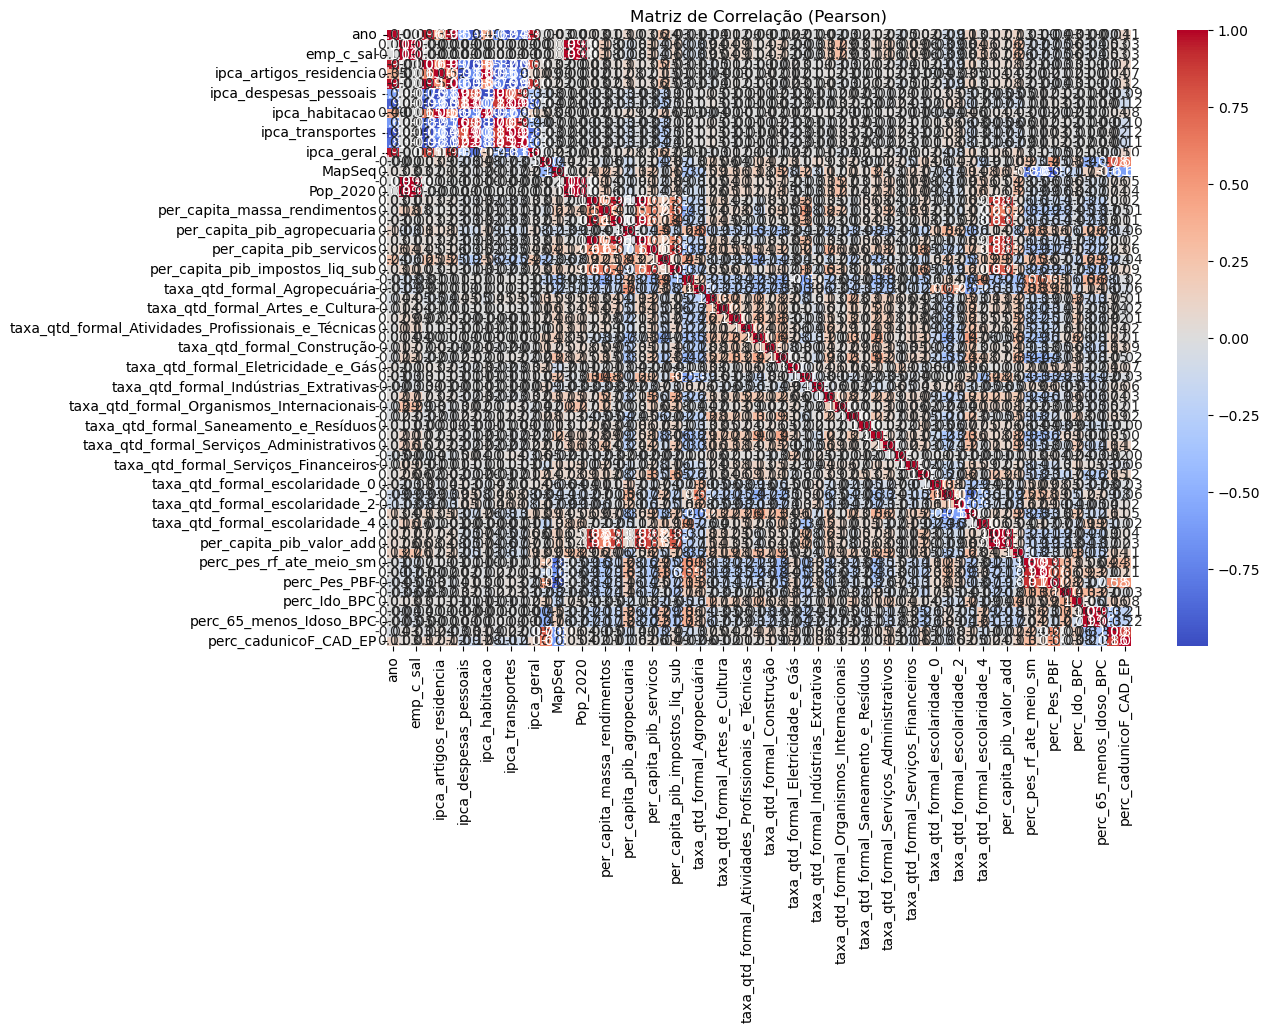

In [44]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação (Pearson)")
plt.show()

In [45]:
corr_pairs = corr_matrix.unstack().sort_values(ascending=False)
# Remove autocorrelação (valor de 1)
corr_pairs = corr_pairs[corr_pairs != 1]


In [46]:
pd.set_option('display.max_rows', 50)

In [47]:
corr_pairs.drop_duplicates().head(50)

per_capita_pib_industria         pib_ind_pc                         1.000000
emp_c_sal                        emprego_formal                     0.999681
ipca_habitacao                   ipca_artigos_residencia            0.998506
ipca_educacao                    ipca_transportes                   0.998005
Fam_PBF_Aux                      Pop_2020                           0.995196
ipca_despesas_pessoais           ipca_saude_cuidados_pessoais       0.995008
emprego_formal                   Pop_2020                           0.994750
emp_c_sal                        Pop_2020                           0.994475
ipca_comunicacao                 ipca_alimentos_bebidas             0.994144
emp_c_sal                        Fam_PBF_Aux                        0.993576
per_capita_pib_valor_add         per_capita_pib                     0.993480
Fam_PBF_Aux                      emprego_formal                     0.993050
perc_65_menos_Idoso_BPC          perc_Pop_65_mais                   0.986321

In [48]:
# emp_c_sal                              Fam_PBF_Aux
#emprego_formal                         Fam_PBF_Aux
#Pop_2020                               Fam_PBF_Aux
# taxa_qtd_formal_escolaridade_1         taxa_qtd_formal_Agropecuária       0.618473
#taxa_qtd_formal_Administração_Pública  perc_pes_insc_cadun                0.588429


In [49]:
# taxa_qtd_formal_escolaridade_3              taxa_qtd_formal_Agropecuária                 -0.544501




## Crescimento Formal por setor

In [50]:
# Sort by municipality and year to ensure correct calculation of year-on-year difference
df_crescimento = df.sort_values(by=['cod_ibge', 'ano'])

# Calculate the year-on-year difference in 'emprego_formal' for each municipality
# Use .groupby() to perform the calculation within each municipality group
df_crescimento['emprego_growth_yoy'] = df_crescimento.groupby('cod_ibge')['emprego_formal'].diff()

# Display the first few rows with the new growth column
display(df_crescimento[['cod_ibge', 'ano', 'emprego_formal', 'emprego_growth_yoy']].head(12))

,cod_ibge,ano,emprego_formal,emprego_growth_yoy
0,3500105,2018,10445,NaN
645,3500105,2019,10101,-344.0
1290,3500105,2020,9989,-112.0
1,3500204,2018,854,NaN
646,3500204,2019,947,93.0
1291,3500204,2020,975,28.0
2,3500303,2018,6984,NaN
647,3500303,2019,6773,-211.0
1292,3500303,2020,6799,26.0
3,3500402,2018,983,NaN


In [51]:
# Group by year and sum the 'emprego_formal' column
total_emprego_por_ano = df.groupby('ano')['emprego_formal'].sum().sort_index()

# Diferenca anual
print("\nDiferenças Anuais no emprego formal:")
anos = total_emprego_por_ano.index

for i in range(1, len(anos)):
    ano_anterior = anos[i - 1]
    ano_atual = anos[i]
    valor_anterior = total_emprego_por_ano[ano_anterior]
    valor_atual = total_emprego_por_ano[ano_atual]
    diferenca = valor_atual - valor_anterior

    if diferenca > 0:
        status = "crescimento"
    elif diferenca < 0:
        status = "diminuição"
    else:
        status = "numeros foram mantidos"

    print(f"{ano_anterior} → {ano_atual}: {status} de {diferenca}")


Diferenças Anuais no emprego formal:
2018 → 2019: crescimento de 142384
2019 → 2020: diminuição de -139492


In [53]:
#Emprego por Ano e Setor
total_emprego_setor_anual = df.sort_values(by=['cod_ibge', 'ano'])

#Pro Estado inteiro
total_emprego_setor_anual = total_emprego_setor_anual.groupby('ano')[emprego_cols].sum()

# Diferença anual por setor
diferenca_anual_setor = total_emprego_setor_anual.diff()

print("Year-over-year formal employment change by sector for the state:")
display(diferenca_anual_setor)

Year-over-year formal employment change by sector for the state:


,qtd_formal_Administração_Pública,qtd_formal_Agropecuária,qtd_formal_Alojamento_e_Alimentação,qtd_formal_Artes_e_Cultura,qtd_formal_Atividades_Imobiliárias,qtd_formal_Atividades_Profissionais_e_Técnicas,qtd_formal_Comércio,qtd_formal_Construção,qtd_formal_Educação,qtd_formal_Eletricidade_e_Gás,qtd_formal_Indústria_de_Transformação,qtd_formal_Indústrias_Extrativas,qtd_formal_Informação_e_Comunicação,qtd_formal_Organismos_Internacionais,qtd_formal_Outros_Serviços,qtd_formal_Saneamento_e_Resíduos,qtd_formal_Saúde,qtd_formal_Serviços_Administrativos,qtd_formal_Serviços_Domésticos,qtd_formal_Serviços_Financeiros,qtd_formal_Transporte_e_Correios,qtd_formal_escolaridade_0,qtd_formal_escolaridade_1,qtd_formal_escolaridade_2,qtd_formal_escolaridade_3,qtd_formal_escolaridade_4
ano,,,,,,,,,,,,,,,,,,,,,,,,,,
2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019,10816.0,-794.0,11395.0,-4016.0,1955.0,19013.0,6242.0,-3062.0,-5259.0,-398.0,-3494.0,-592.0,18282.0,-186.0,-9112.0,5155.0,10089.0,20118.0,-56.0,50130.0,16158.0,7489.0,-36204.0,-90138.0,260163.0,1074.0
2020,-37226.0,-9810.0,-115891.0,-9906.0,517.0,8511.0,-63083.0,34446.0,-29586.0,-206.0,7183.0,396.0,9641.0,-56.0,-22728.0,1258.0,35978.0,99667.0,-89.0,-34501.0,-14007.0,-699.0,-72727.0,-120876.0,61000.0,-6190.0


In [73]:
df.head()

,ano,cod_ibge,emprego_formal,emp_c_sal,massa_rendimentos_num,qtd_formal_Administração_Pública,qtd_formal_Agropecuária,qtd_formal_Alojamento_e_Alimentação,qtd_formal_Artes_e_Cultura,qtd_formal_Atividades_Imobiliárias,qtd_formal_Atividades_Profissionais_e_Técnicas,qtd_formal_Comércio,qtd_formal_Construção,qtd_formal_Educação,qtd_formal_Eletricidade_e_Gás,qtd_formal_Indústria_de_Transformação,qtd_formal_Indústrias_Extrativas,qtd_formal_Informação_e_Comunicação,qtd_formal_Organismos_Internacionais,qtd_formal_Outros_Serviços,qtd_formal_Saneamento_e_Resíduos,qtd_formal_Saúde,qtd_formal_Serviços_Administrativos,qtd_formal_Serviços_Domésticos,qtd_formal_Serviços_Financeiros,qtd_formal_Transporte_e_Correios,qtd_formal_escolaridade_0,qtd_formal_escolaridade_1,qtd_formal_escolaridade_2,qtd_formal_escolaridade_3,qtd_formal_escolaridade_4,ipca_alimentos_bebidas,ipca_artigos_residencia,ipca_comunicacao,ipca_despesas_pessoais,ipca_educacao,ipca_habitacao,ipca_saude_cuidados_pessoais,ipca_transportes,ipca_vestuario,ipca_geral,localidade,pib_agropecuaria,pib_impostos_liq_sub,pib_industria,pib,pib_servicos,pib_servicos_adm_publica,pib_valor_add,n_fam_rua,pes_rf_ate_meio_sm,pes_insc_cadun,perc_rf_ate_meio_sm,Pes_PBF,Fam_PBF,MapSeq,F_CAD_EP,Fam_PBF_Aux,PCD_BPC,Ido_BPC,Pop_65_mais,Pop_2020,65_menos_Idoso_BPC,pib_ind_pc,per_capita_massa_rendimentos,razao_pib_renda,per_capita_pib_agropecuaria,per_capita_pib_industria,per_capita_pib_servicos,per_capita_pib_servicos_adm_publica,per_capita_pib_impostos_liq_sub,taxa_qtd_formal_Administração_Pública,taxa_qtd_formal_Agropecuária,taxa_qtd_formal_Alojamento_e_Alimentação,taxa_qtd_formal_Artes_e_Cultura,taxa_qtd_formal_Atividades_Imobiliárias,taxa_qtd_formal_Atividades_Profissionais_e_Técnicas,taxa_qtd_formal_Comércio,taxa_qtd_formal_Construção,taxa_qtd_formal_Educação,taxa_qtd_formal_Eletricidade_e_Gás,taxa_qtd_formal_Indústria_de_Transformação,taxa_qtd_formal_Indústrias_Extrativas,taxa_qtd_formal_Informação_e_Comunicação,taxa_qtd_formal_Organismos_Internacionais,taxa_qtd_formal_Outros_Serviços,taxa_qtd_formal_Saneamento_e_Resíduos,taxa_qtd_formal_Saúde,taxa_qtd_formal_Serviços_Administrativos,taxa_qtd_formal_Serviços_Domésticos,taxa_qtd_formal_Serviços_Financeiros,taxa_qtd_formal_Transporte_e_Correios,taxa_qtd_formal_escolaridade_0,taxa_qtd_formal_escolaridade_1,taxa_qtd_formal_escolaridade_2,taxa_qtd_formal_escolaridade_3,taxa_qtd_formal_escolaridade_4,per_capita_pib,per_capita_pib_valor_add,perc_n_fam_rua,perc_pes_rf_ate_meio_sm,perc_pes_insc_cadun,perc_Pes_PBF,perc_PCD_BPC,perc_Ido_BPC,perc_Pop_65_mais,perc_65_menos_Idoso_BPC,perc_cadunicoFam_PBF,perc_cadunicoF_CAD_EP
0,2018,3500105,10445,9793,21389288.64,996,692,275,20,31,216,2892,362,681,14,1795,0,100,0,390,48,763,753,0,184,233,17,759,1590,6215,1864,4.030782,3.759616,-0.080826,2.989517,5.31092,4.724189,3.951694,4.202469,0.602078,3.745482,Adamantina,35509879,82052356,122889808,1070909946,652715241,177742662,988857590,4,2838,4976,57,943.583333,284.916667,4.0,96.583333,284.916667,391.250000,204.333333,5282,33894,5077.666667,3625.709801,2047.801689,1.770538,1047.674485,3625.709801,19257.545318,5244.074526,2420.851950,0.095357,0.066252,0.026328,0.001915,0.002968,0.020680,0.276879,0.034658,0.065199,0.001340,0.171853,0.000000,0.009574,0.0,0.037338,0.004596,0.073049,0.072092,0.0,0.017616,0.022307,0.001628,0.072666,0.152226,0.595022,0.178459,31595.856081,29175.004131,0.000118,0.083732,0.146811,0.027839,0.011543,0.006029,0.155839,0.149810,0.057258,0.019410
1,2018,3500204,854,828,1628663.10,309,318,2,9,0,2,66,21,0,0,8,32,0,0,54,3,1,18,0,3,8,8,228,168,312,138,4.030782,3.759616,-0.080826,2.989517,5.31092,4.724189,3.951694,4.202469,0.602078,3.745482,Adolfo,22647055,3135155,10942193,92202519,33284014,22194101,89067364,1,1091,1742,"62,6",508.666667,162.583333,3.0,140.000000,162.583333,20.166667,20.583333,521,3447,500.416667,3174.410502,1907.099649,1.664523,6570.076878,3174.410502,9655.936757,6438.671598,909.531477,0.361827,0.372365,0.002342,0.010539,0.000000,0.002342

In [74]:
# Select the relevant employment columns (assuming 'emprego_cols' is already defined)
# And select only the total 'pib' column
employment_cols_only = emprego_cols
total_pib_col = ['per_capita_massa_rendimentos', 'per_capita_pib']

# Combine the lists of columns for correlation calculation
employment_total_pib_cols = employment_cols_only + total_pib_col

# Calculate the correlation matrix for the selected columns
# Ensure the data is numeric before calculating correlation
df_numeric_employment_pib = df[employment_total_pib_cols].apply(pd.to_numeric, errors='coerce')
correlation_matrix = df_numeric_employment_pib.corr(method='pearson')

# Extract correlations between employment sectors and the total PIB column
employment_pib_correlations = correlation_matrix.loc[employment_cols_only, total_pib_col]

# Display the correlations, sorted to see the strongest relationships
print("Correlations between Employment Sectors and Total PIB:")
display(employment_pib_correlations.stack().sort_values(ascending=False))


Correlations between Employment Sectors and Total PIB:


qtd_formal_Indústria_de_Transformação  per_capita_massa_rendimentos    0.360024
qtd_formal_Saneamento_e_Resíduos       per_capita_massa_rendimentos    0.275756
qtd_formal_Transporte_e_Correios       per_capita_massa_rendimentos    0.249833
qtd_formal_Eletricidade_e_Gás          per_capita_massa_rendimentos    0.248814
qtd_formal_Comércio                    per_capita_massa_rendimentos    0.230677
                                                                         ...   
qtd_formal_Serviços_Financeiros        per_capita_pib                  0.053999
qtd_formal_Saúde                       per_capita_pib                  0.052240
qtd_formal_Atividades_Imobiliárias     per_capita_pib                  0.051277
qtd_formal_Organismos_Internacionais   per_capita_pib                  0.046688
qtd_formal_Administração_Pública       per_capita_pib                  0.046468
Length: 52, dtype: float64

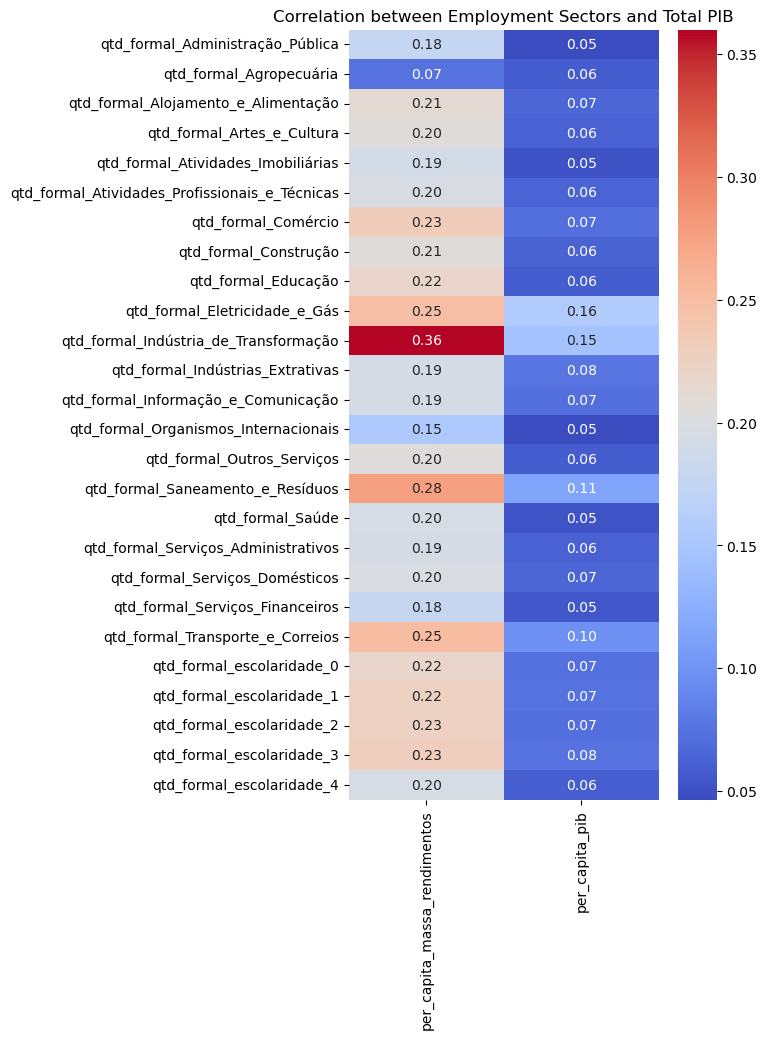

In [75]:
# Optional: Visualize the correlations as a heatmap
plt.figure(figsize=(5, 10)) # Adjust figure size for fewer columns
sns.heatmap(employment_pib_correlations, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation between Employment Sectors and Total PIB")
plt.show()

## PCA

In [59]:
# Select only numeric columns from df_pad for standardization
df_pad_numeric = df_pad.select_dtypes(include=np.number)

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the numeric columns and store in df_pca
# Drop non-feature columns like 'cod_ibge' and 'ano' before fitting and transforming
cols_to_standardize_in_pad = df_pad_numeric.drop(columns=['cod_ibge', 'ano'], errors='ignore').columns
df_pca = pd.DataFrame(scaler.fit_transform(df_pad_numeric[cols_to_standardize_in_pad]), columns=cols_to_standardize_in_pad)

# Display the first few rows of the standardized DataFrame
display(df_pca.head())

,emprego_formal,emp_c_sal,ipca_alimentos_bebidas,ipca_artigos_residencia,ipca_comunicacao,ipca_despesas_pessoais,ipca_educacao,ipca_habitacao,ipca_saude_cuidados_pessoais,ipca_transportes,ipca_vestuario,ipca_geral,MapSeq,Fam_PBF_Aux,Pop_2020,pib_ind_pc,per_capita_massa_rendimentos,razao_pib_renda,per_capita_pib_agropecuaria,per_capita_pib_industria,per_capita_pib_servicos,per_capita_pib_servicos_adm_publica,per_capita_pib_impostos_liq_sub,taxa_qtd_formal_Administração_Pública,taxa_qtd_formal_Agropecuária,taxa_qtd_formal_Alojamento_e_Alimentação,taxa_qtd_formal_Artes_e_Cultura,taxa_qtd_formal_Atividades_Imobiliárias,taxa_qtd_formal_Atividades_Profissionais_e_Técnicas,taxa_qtd_formal_Comércio,taxa_qtd_formal_Construção,taxa_qtd_formal_Educação,taxa_qtd_formal_Eletricidade_e_Gás,taxa_qtd_formal_Indústria_de_Transformação,taxa_qtd_formal_Indústrias_Extrativas,taxa_qtd_formal_Informação_e_Comunicação,taxa_qtd_formal_Organismos_Internacionais,taxa_qtd_formal_Outros_Serviços,taxa_qtd_formal_Saneamento_e_Resíduos,taxa_qtd_formal_Saúde,taxa_qtd_formal_Serviços_Administrativos,taxa_qtd_formal_Serviços_Domésticos,taxa_qtd_formal_Serviços_Financeiros,taxa_qtd_formal_Transporte_e_Correios,taxa_qtd_formal_escolaridade_0,taxa_qtd_formal_escolaridade_1,taxa_qtd_formal_escolaridade_2,taxa_qtd_formal_escolaridade_3,taxa_qtd_formal_escolaridade_4,per_capita_pib,per_capita_pib_valor_add,perc_n_fam_rua,perc_pes_rf_ate_meio_sm,perc_pes_insc_cadun,perc_Pes_PBF,perc_PCD_BPC,perc_Ido_BPC,perc_Pop_65_mais,perc_65_menos_Idoso_BPC,perc_cadunicoFam_PBF,perc_cadunicoF_CAD_EP
0,-0.051924,-0.051782,-0.960325,0.239911,-1.066885,0.064379,0.851174,0.163394,0.205041,0.920782,0.624484,-1.363705,1.011177,-0.111884,-0.073602,-0.243847,0.273347,-0.216141,-0.647643,-0.243847,0.277740,0.210519,-0.212667,-0.916665,-0.558849,-0.037473,-0.204327,0.605893,0.540344,1.372533,0.393468,2.174818,-0.133366,-0.227282,-0.333363,0.288809,-0.038938,1.126045,-0.079310,1.279158,0.614787,-0.138774,0.360904,-0.364154,-0.434936,-0.864141,-0.366664,0.811963,0.246565,-0.132493,-0.110493,-0.575042,-1.677173,-1.388657,-1.635908,0.310570,-0.353514,1.443558,1.496825,-1.972119,-1.894690
1,-0.100898,-0.100770,-0.960325,0.239911,-1.066885,0.064379,0.851174,0.163394,0.205041,0.920782,0.624484,-1.363705,-0.448811,-0.118424,-0.137057,-0.268501,-0.128670,-0.233413,0.444342,-0.268501,-0.364791,1.180906,-0.454863,0.655428,1.709924,-0.704413,1.150712,-0.499620,-0.602867,-1.228820,0.052038,-0.739170,-0.308989,-1.167231,2.557226,-0.524592,-0.038938,2.573233,-0.167901,-0.714040,-0.190378,-0.138774,-0.324712,-0.730826,1.698423,1.890907,0.433963,-1.813256,-0.103956,-0.270414,-0.221203,-0.198205,0.713828,1.550794,0.303089,-0.936514,-0.366100,1.272488,1.328440,-1.011575,-0.718731
2,-0.069597,-0.068186,-0.960325,0.239911,-1.066885,0.064379,0.851174,0.163394,0.205041,0.920782,0.624484,-1.363705,-0.448811,-0.054013,-0.070029,0.004987,-0.135630,0.051903,-0.399802,0.004987,-0.347696,-1.129180,-0.067529,-0.756983,0.375338,-0.240027,0.102257,-0.019611,-0.338254,0.311218,-0.184628,-0.182415,-0.215184,0.563562,0.704925,-0.293459,-0.038938,-0.376618,-0.408494,-0.563866,-0.335471,-0.138774,0.075297,0.768706,-0.173163,-0.412440,1.111806,-0.377218,0.019353,-0.254314,-0.282639,-0.587481,-0.048353,-0.176183,0.068589,-0.130543,-0.527496,-0.626544,-0.537209,-0.027279,-0.707778
3,-0.100239,-0.100065,-0.960325,0.239911,-1.066885,0.064379,0.851174,0.163394,0.205041,0.920782,0.624484,-1.363705,1.011177,-0.118852,-0.127991,-0.308335,-0.670298,-0.310560,-0.601595,-0.308335,-0.231285,-0.632013,-0.311435,0.207245,0.503304,0.050756,-0.345348,-0.499620,-0.368348,-0.061667,0.253102,-0.648236,-0.308989,-0.297495,-0.333363,0.080411,-0.038938,0.801752,0.543584,-0.210526,-0.458818,-0.138774,0.543065,-0.621526,-0.042362,0.355651,0.189100,-0.942693,0.977555,-0.422939,-0.428806,0.009068,-0.782474,-0.618675,-0.901620,-0.811011,0.487923,1.541388,1.455347,-1.303808,-1.171978
4,-0.081745,-0.080836,-0.960325,0.239911,-1.066885,0.064379,0.851174,0.1

In [62]:
from sklearn.decomposition import PCA

# Drop non-numeric columns if any remain and non-feature columns
df_pca = df_pca.select_dtypes(include=np.number).drop(columns=['cod_ibge', 'ano'], errors='ignore')

# Apply PCA
pca = PCA()
pca.fit(df_pca)

# Cumulative explained variance
print("\nCumulative explained variance:")
print(np.cumsum(pca.explained_variance_ratio_))




Cumulative explained variance:
[0.14864484 0.28383422 0.37419765 0.44298047 0.50466823 0.55037819
 0.58197975 0.61216112 0.63686666 0.66014411 0.68094766 0.70128411
 0.7203315  0.73720683 0.75368558 0.76928526 0.78466489 0.79980749
 0.81450613 0.82888477 0.84248251 0.85575007 0.86857644 0.88074707
 0.8922951  0.90378075 0.91462847 0.92513152 0.9346926  0.94408115
 0.95324959 0.96172161 0.96930105 0.97572013 0.98146067 0.98671131
 0.99126497 0.99390645 0.99569985 0.9974329  0.99857973 0.9991417
 0.9996022  0.99983856 0.99994096 0.99999562 1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.        ]


In [64]:
# Calculate the correlation matrix for df_pca
corr_matrix_pca = df_pca.corr(method='pearson')

# Display the correlation matrix
display(corr_matrix_pca)

,emprego_formal,emp_c_sal,ipca_alimentos_bebidas,ipca_artigos_residencia,ipca_comunicacao,ipca_despesas_pessoais,ipca_educacao,ipca_habitacao,ipca_saude_cuidados_pessoais,ipca_transportes,ipca_vestuario,ipca_geral,MapSeq,Fam_PBF_Aux,Pop_2020,pib_ind_pc,per_capita_massa_rendimentos,razao_pib_renda,per_capita_pib_agropecuaria,per_capita_pib_industria,per_capita_pib_servicos,per_capita_pib_servicos_adm_publica,per_capita_pib_impostos_liq_sub,taxa_qtd_formal_Administração_Pública,taxa_qtd_formal_Agropecuária,taxa_qtd_formal_Alojamento_e_Alimentação,taxa_qtd_formal_Artes_e_Cultura,taxa_qtd_formal_Atividades_Imobiliárias,taxa_qtd_formal_Atividades_Profissionais_e_Técnicas,taxa_qtd_formal_Comércio,taxa_qtd_formal_Construção,taxa_qtd_formal_Educação,taxa_qtd_formal_Eletricidade_e_Gás,taxa_qtd_formal_Indústria_de_Transformação,taxa_qtd_formal_Indústrias_Extrativas,taxa_qtd_formal_Informação_e_Comunicação,taxa_qtd_formal_Organismos_Internacionais,taxa_qtd_formal_Outros_Serviços,taxa_qtd_formal_Saneamento_e_Resíduos,taxa_qtd_formal_Saúde,taxa_qtd_formal_Serviços_Administrativos,taxa_qtd_formal_Serviços_Domésticos,taxa_qtd_formal_Serviços_Financeiros,taxa_qtd_formal_Transporte_e_Correios,taxa_qtd_formal_escolaridade_0,taxa_qtd_formal_escolaridade_1,taxa_qtd_formal_escolaridade_2,taxa_qtd_formal_escolaridade_3,taxa_qtd_formal_escolaridade_4,per_capita_pib,per_capita_pib_valor_add,perc_n_fam_rua,perc_pes_rf_ate_meio_sm,perc_pes_insc_cadun,perc_Pes_PBF,perc_PCD_BPC,perc_Ido_BPC,perc_Pop_65_mais,perc_65_menos_Idoso_BPC,perc_cadunicoFam_PBF,perc_cadunicoF_CAD_EP
emprego_formal,1.000000,0.999681,-1.468731e-04,-4.902849e-04,-9.142846e-05,4.380247e-04,1.968760e-04,-4.791333e-04,4.067660e-04,1.656830e-04,2.847944e-04,1.419886e-04,0.025132,0.993050,9.947497e-01,0.008628,0.176808,-0.001090,-0.076669,0.008628,0.140548,-0.059957,0.104870,-0.081896,-0.092220,0.044820,0.042214,0.093047,0.114171,0.035098,0.065553,0.117825,-0.003872,-0.028510,-0.025026,0.168074,0.285436,0.027281,0.011948,0.099439,0.159282,-0.004881,0.091523,0.062500,-0.034608,-0.091175,-0.079624,0.035196,0.164224,0.069742,0.059627,0.265269,-0.067888,-0.070485,-0.052993,-0.062990,0.033200,-4.361346e-02,-0.048942,0.030613,0.029449
emp_c_sal,0.999681,1.000000,-2.177568e-03,-7.417993e-04,-2.244147e-03,1.190723e-03,2.092801e-03,-8.595406e-04,1.380916e-03,2.148554e-03,1.877886e-03,-2.236901e-03,0.025149,0.993576,9.944752e-01,0.008629,0.176195,-0.001090,-0.076646,0.008629,0.139909,-0.060535,0.104519,-0.081880,-0.092159,0.045012,0.042374,0.092966,0.113821,0.035336,0.065397,0.118007,-0.003993,-0.028355,-0.025074,0.167582,0.286434,0.027259,0.011882,0.099401,0.158733,-0.004823,0.091329,0.062246,-0.034766,-0.091103,-0.079239,0.034976,0.164086,0.069391,0.059291,0.264526,-0.068020,-0.070626,-0.053009,-0.062977,0.033114,-4.360729e-02,-0.048922,0.030744,0.029142
ipca_alimentos_bebidas,-0.000147,-0.002178,1.000000e+00,6.082529e-01,9.941445e-01,-7.642411e-01,-9.949411e-01,6.507176e-01,-8.247860e-01,-9.992988e-01,-9.584963e-01,8.492365e-01,0.022417,0.000342,-3.144198e-17,0.033040,0.014911,0.031734,0.109406,0.033040,0.052936,0.253861,0.029558,-0.009388,-0.006908,-0.045496,-0.008310,0.015371,0.005505,0.000034,-0.000064,-0.018813,0.026273,0.010019,0.000608,0.025740,-0.027537,-0.023328,0.002796,0.018781,0.023501,-0.041866,-0.006487,0.017687,0.006976,-0.085370,-0.099564,0.127276,0.008183,0.069601,0.075058,0.116395,0.007515,-0.003639,-0.034690,-0.027977,0.014166,4.762197e-17,-0.002339,-0.020539,0.116803
ipca_artigos_residencia,-0.000490,-0.000742,6.082529e-01,1.000000e+00,5.189200e-01,-9.767612e-01,-6.849150e-01,9.985059e-01,-9.504967e-01,-6.375449e-01,-8.093083e-01,9.744409e-02,0.002501,0.001647,-5.737587e-18,0.021637,0.007136,0.023242,0.083985,0.021637,0.014670,0.147874,0.005124,-0.006786,-0.002608,-0.040680,-0.004217,-0.003954,0.005202,-0.000648,0.022227,-0.005760,0.016631,0.006222,0.009316,0.019944,0.006372,-0.013553,-0.010782,0.006267,0.019248,0.008000,-0.008576,-0.000375,-0.042787,-0.034324,-0.029948,0.0492